**Task 1**

*Exploratory Data Analysis *

In [158]:
# import libraries

# install necessary packages
# !pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import datetime as dt

Load the Dataset

In [159]:
df = pd.read_excel('/content/drive/MyDrive/telcom_data.xlsx')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


# check the basic information

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [161]:
# check the first few rows

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [162]:
# Shape of the dataset

df.shape

(150001, 55)

In given dataset there are 150001 rows and 55 columns

In [163]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start,150000,2019-04-26 12:36:38.953740032,2019-04-04 12:01:18,2019-04-25 00:26:00.750000128,2019-04-26 08:51:24.500000,2019-04-27 18:18:59.750000128,2019-04-29 07:28:43,NaN
Start ms,150000.0,499.1882,0.0,250.0,499.0,749.0,999.0,288.611834
End,150000,2019-04-27 17:40:08.059673344,2019-04-24 22:59:58,2019-04-26 07:30:11.500000,2019-04-27 23:02:05,2019-04-29 07:15:07.500000,2019-04-30 23:59:27,NaN
End ms,150000.0,498.80088,0.0,251.0,500.0,750.0,999.0,288.097653
Dur. (ms),150000.0,104608.560347,7142.0,57440.5,86399.0,132430.25,1859336.0,81037.621479
IMSI,149431.0,208201639651669.0625,204047108489451.0,208201401263249.0,208201546329113.0,208201771619103.0,214074303349628.0,21488090841.366436
MSISDN/Number,148935.0,41882819545.027359,33601001722.0,33651295581.5,33663706799.0,33683490769.0,882397108489451.0,2447443358621.660156
IMEI,149429.0,48474547977654.53125,440015202000.0,35460708865439.0,35722009426311.0,86119704674953.0,99001201327774.0,22416372027957.652344
Avg RTT DL (ms),122172.0,109.795706,0.0,32.0,45.0,70.0,96923.0,619.782739
Avg RTT UL (ms),122189.0,17.662883,0.0,2.0,5.0,15.0,7120.0,84.793524


In [164]:
# check for the null-values
df.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [165]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print("Missing data:\n",missing_data)

Missing data:
 Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
Nb of sec with V

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

**Checking For Duplicates In BearerID and MSISDN/Number Features**

In [167]:
df['Bearer Id'].duplicated().value_counts()

,count
Bearer Id,
False,134709
True,15292


In [168]:
df['MSISDN/Number'].duplicated().value_counts()

,count
MSISDN/Number,
False,106857
True,43144


In [169]:
# Find the mode of 'Bearer Id'
bearer_id_mode = df['Bearer Id'].mode()[0]
# Find the mode of 'Bearer Id'
bearer_id_mode = df['Bearer Id'].mode()[0]

print(f"The mode of Bearer ID is: {bearer_id_mode}")
#The mode of Bearer ID is:

The mode of Bearer ID is: 


Find the 2nd Most Occuring Bearer ID

In [170]:
# Find the value counts of 'Bearer Id'
bearer_id_counts = df['Bearer Id'].value_counts()
bearer_id_counts

# Get the second most occurring Bearer ID
if len(bearer_id_counts) >= 2:
  second_most_occurring_bearer_id = bearer_id_counts.index[1]
  print(f"The second most occurring Bearer ID is: {second_most_occurring_bearer_id}")
else:
  print("There are not enough unique Bearer IDs to find the second most occurring one.")

The second most occurring Bearer ID is: 13042425979269199872


Find the Mode of MSISDN/Number

In [171]:
df['MSISDN/Number'].mode()

,MSISDN/Number
0,3.362632e+10



Handling null values

In [172]:
#Filling missing values with the mean
# for numerical features
for column in df.select_dtypes(include=np.number):
  df[column].fillna(df[column].mean(), inplace=True)

# for categorical features
for column in df.select_dtypes(include='object'):
  df[column].fillna(df[column].mode()[0], inplace=True)

In [173]:
# Check for null values after handling them
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

Finding Unique values

In [174]:
df[['Bearer Id','IMEI','MSISDN/Number']].nunique()

,0
Bearer Id,134709
IMEI,107271
MSISDN/Number,106857


Univariate Analysis by dispersion parameters for each quantitative variable.

In [175]:
quantitative_variables = df.select_dtypes(include=np.number).columns

for variable in quantitative_variables:
  print(f"\nDispersion parameters for {variable}:")
  print(f"Range: {df[variable].max() - df[variable].min()}")
  print(f"Interquartile Range (IQR): {df[variable].quantile(0.75) - df[variable].quantile(0.25)}")
  print(f"Variance: {df[variable].var()}")
  print(f"Standard Deviation: {df[variable].std()}")


Dispersion parameters for Start ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 83296.23555408431
Standard Deviation: 288.61087220353346

Dispersion parameters for End ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 82999.70444456632
Standard Deviation: 288.0966928733586

Dispersion parameters for Dur. (ms):
Range: 1852194.0
Interquartile Range (IQR): 74988.0
Variance: 6567052314.329869
Standard Deviation: 81037.35135312524

Dispersion parameters for IMSI:
Range: 10027194860177.0
Interquartile Range (IQR): 370342358.0
Variance: 4.599834434243916e+20
Standard Deviation: 21447224608.895008

Dispersion parameters for MSISDN/Number:
Range: 882363507487729.0
Interquartile Range (IQR): 33222169.0
Variance: 5.947410209612986e+24
Standard Deviation: 2438731270479.178

Dispersion parameters for IMEI:
Range: 98561186125774.0
Interquartile Range (IQR): 50657094738467.0
Variance: 5.0057755878673294e+26
Standard Deviation: 22373590654759.305

Dispersion parameters for Avg R

 Univariate Analysis for Numerical Features

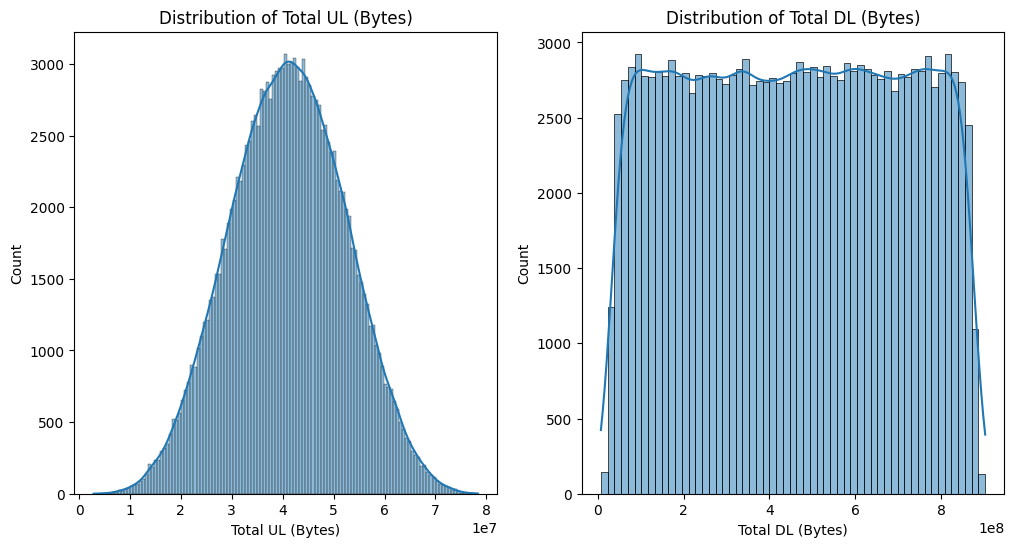

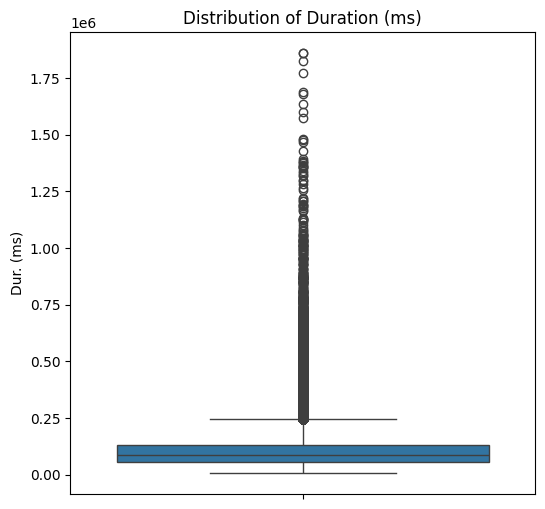

In [176]:
# Histogram for Total UL (Uplink) and DL (Downlink)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total UL (Bytes)'], kde=True)
plt.title('Distribution of Total UL (Bytes)')

plt.subplot(1, 2, 2)
sns.histplot(df['Total DL (Bytes)'], kde=True)
plt.title('Distribution of Total DL (Bytes)')
plt.show()

# Boxplot for Duration
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Dur. (ms)'])
plt.title('Distribution of Duration (ms)')
plt.show()


Insight

*  Total UL(Bytes) shows a normal-like distribution, indicating a concentration around a central upload size.
*   Total DL(Bytes) has a uniform distribution, suggesting even spread across download sizes.
*   Duration(ms)  reveals potential outliers (long durations), indicating some calls/sessions might be unusually longer than the average.






Find Skewness

In [177]:
#skewness for numerical features
skewness = df.select_dtypes(include=np.number).skew()
print(skewness)

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952622
IMSI                                         41.124164
MSISDN/Number                               333.342413
IMEI                                          1.073519
Avg RTT DL (ms)                              69.705161
Avg RTT UL (ms)                              31.530109
Avg Bearer TP DL (kbps)                       2.589445
Avg Bearer TP UL (kbps)                       4.503428
TCP DL Retrans. Vol (Bytes)                  24.840677
TCP UL Retrans. Vol (Bytes)                 141.035684
DL TP < 50 Kbps (%)                          -2.303600
50 Kbps < DL TP < 250 Kbps (%)                3.279706
250 Kbps < DL TP < 1 Mbps (%)                 4.577678
DL TP > 1 Mbps (%)                            5.383899
UL TP < 10 Kbps (%)                          -9.008830
10 Kbps < UL TP < 50 Kbps (%)                10.972894
50 Kbps < 

TASK 1

**User Overview Analysis**

The top 10 handsets used by the customers

In [178]:
top_10_handsets = df['Handset Type'].value_counts(ascending=False).head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


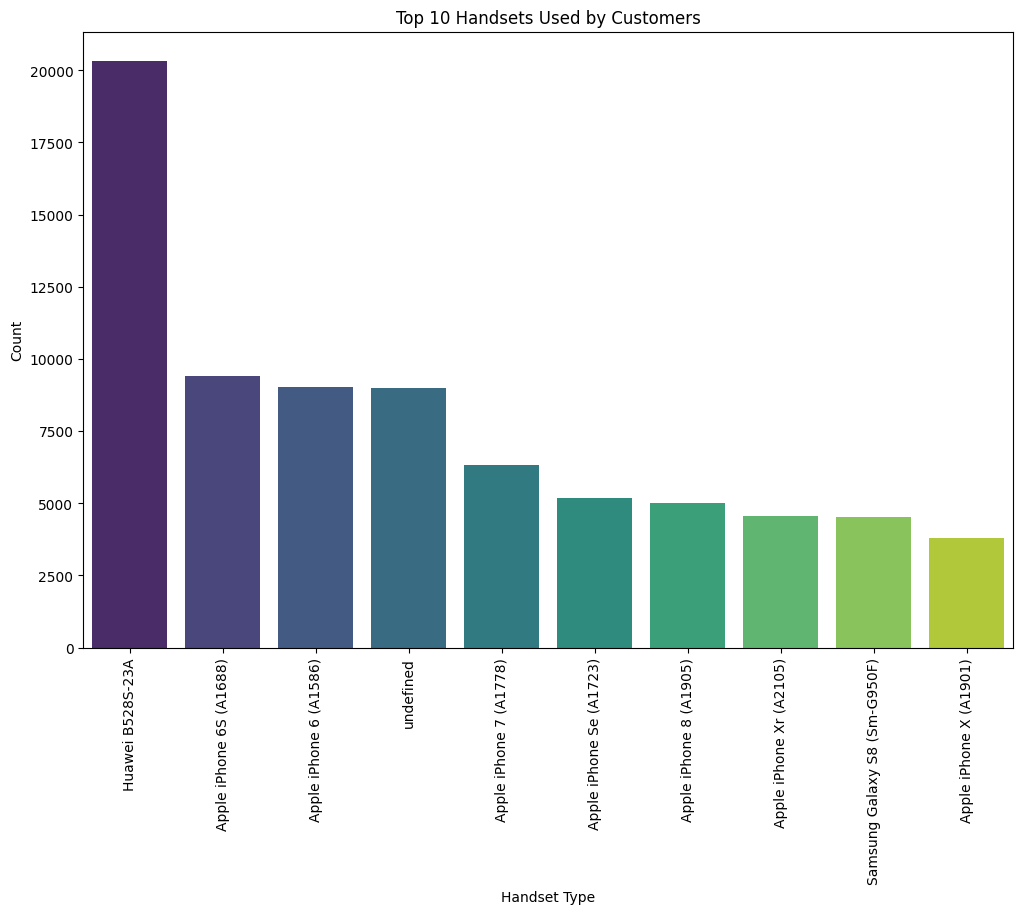

In [179]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values,palette='viridis')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Huawei B525S-23A: This model is the most popular handset by a large margin, with significantly higher usage than any other handset. This suggests that Huawei has a strong market presence with this specific model.

Top 5 handset manufacturers

In [180]:
top_5_handsets = df['Handset Manufacturer'].value_counts(ascending=False).head(5)
print(top_5_handsets)

Handset Manufacturer
Apple                            60137
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: count, dtype: int64


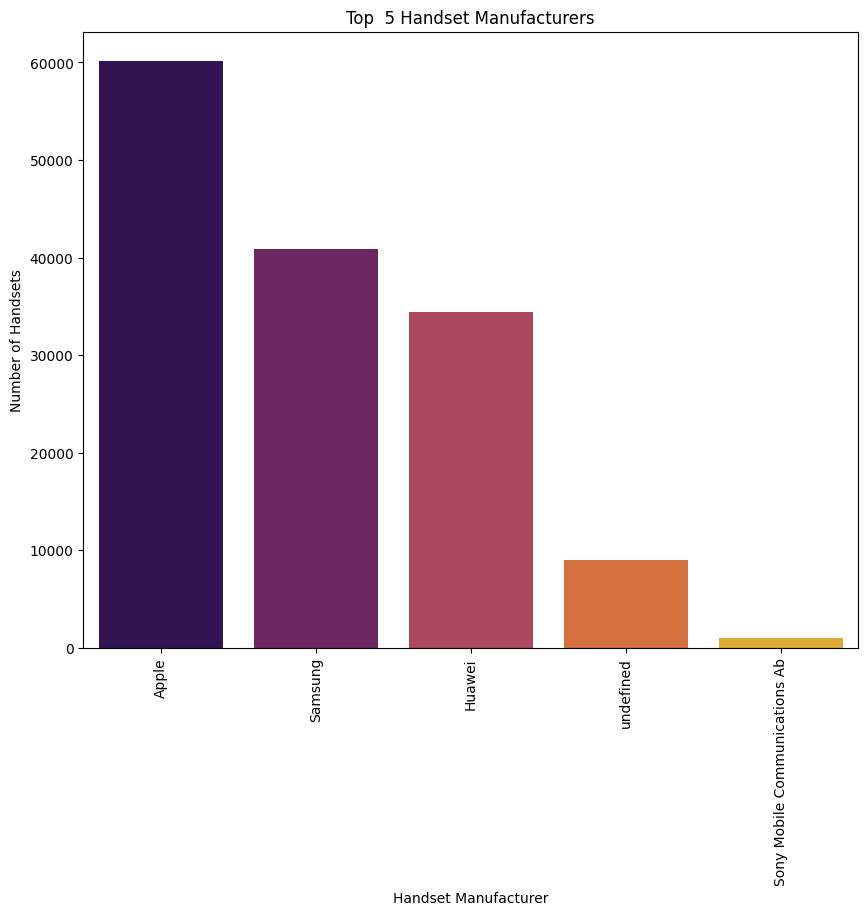

In [181]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_handsets.index, y=top_5_handsets.values,palette='inferno')
plt.title('Top  5 Handset Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Number of Handsets')
plt.xticks(rotation=90)
plt.show()

The top three brands (Apple, Samsung, and Huawei) dominate the market, while other manufacturers contribute minimally. This may suggest a concentrated market with high brand loyalty among top manufacturers.

Top 5 handsets per top 3 handset manufacturer

In [182]:
# Group by Handset Manufacturer and then find the top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Filter for the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()
top_5_handsets_top_3_manufacturers = top_5_handsets_per_manufacturer[top_5_handsets_per_manufacturer.index.get_level_values('Handset Manufacturer').isin(top_3_manufacturers)]

print(top_5_handsets_top_3_manufacturers)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

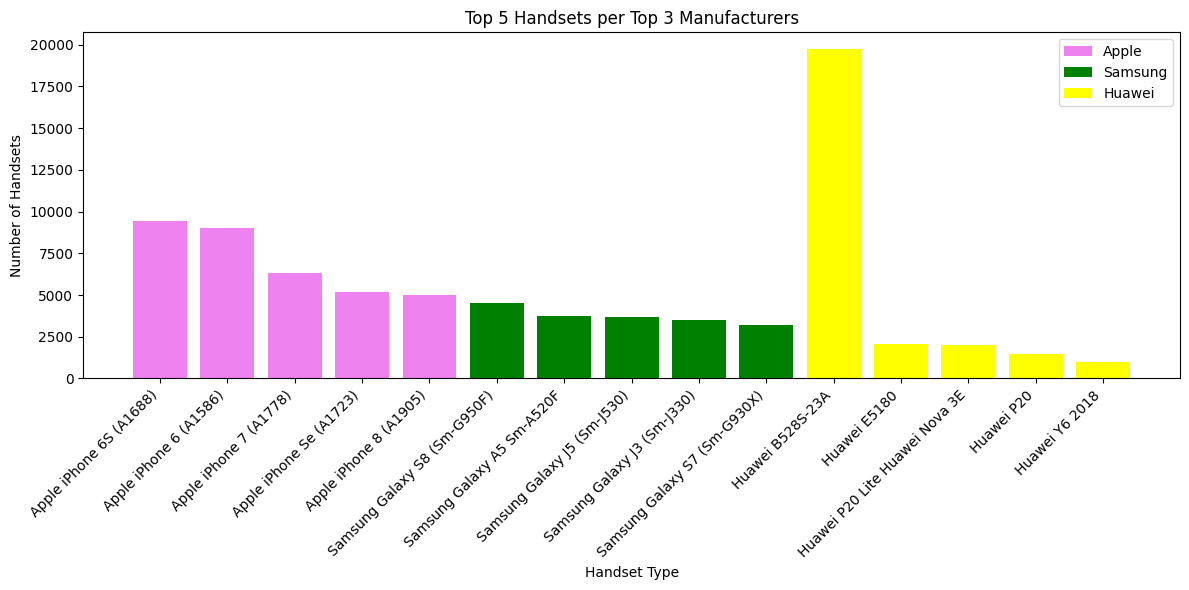

In [183]:
# Create a bar plot for the top 5 handsets for each of the top 3 manufacturers
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette for the different manufacturers
colors = ['violet', 'green', 'yellow']

# Iterate through the top 3 manufacturers and create bars for their top 5 handsets
for i, manufacturer in enumerate(top_3_manufacturers):
  manufacturer_data = top_5_handsets_top_3_manufacturers[manufacturer]
  ax.bar(manufacturer_data.index, manufacturer_data.values, color=colors[i], label=manufacturer)

ax.set_xlabel('Handset Type')
ax.set_ylabel('Number of Handsets')
ax.set_title('Top 5 Handsets per Top 3 Manufacturers')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [184]:
df['Handset Manufacturer'].value_counts()

,count
Handset Manufacturer,
Apple,60137
Samsung,40839
Huawei,34423
undefined,8987
Sony Mobile Communications Ab,980
...,...
Pt. Arga Mas Lestari,1
Doke Communication (Hk) Limited,1
Vastking Technology (Hk) Limited,1


TASK 1.1

**Your employer wants to have an overview of the users’ behavior on those applications**

*   Aggregate per user the following information in the column.

*  numberof xDRsessions
*   Session duration
*   the total download (DL) and upload (UL) data
*   th total data volume (in Bytes) during this session for each application






Numberof xDRsessions per user

In [185]:
# Group by 'Bearer Id' and count the number of xDR sessions for each user
xDR_sessions_per_user = df.groupby('Bearer Id')['Dur. (ms)'].count().reset_index(name='Number of xDR Sessions')

print(xDR_sessions_per_user)


                   Bearer Id  Number of xDR Sessions
0        6917537518543529984                       1
1        6917537604825860096                       1
2        6917537608536819712                       1
3        6917537633966310400                       1
4        6917537638622189568                       1
...                      ...                     ...
134704  13186541164985800704                       1
134705  13186541166737199104                       1
134706  13186541166776899584                       1
134707  13186541167134199808                       1
134708                                           991

[134709 rows x 2 columns]


Numberof xDRsessions per user based on MSISDN/Number

In [186]:
xDR_sessions_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].count().reset_index(name='Number of xDR Sessions')
print(xDR_sessions_per_user)


        MSISDN/Number  Number of xDR Sessions
0        3.360100e+10                       1
1        3.360100e+10                       1
2        3.360100e+10                       1
3        3.360101e+10                       1
4        3.360101e+10                       2
...               ...                     ...
106852   3.379000e+10                       1
106853   4.188282e+10                    1066
106854   3.197021e+12                       1
106855   3.370000e+14                       1
106856   8.823971e+14                       1

[106857 rows x 2 columns]


Total Session Duration based on Bearer Id

In [187]:
# Calculate session duration per user
session_duration_per_user = df.groupby('Bearer Id')['Dur. (ms)'].sum().reset_index(name='Total Session Duration')

# Print the results
print(session_duration_per_user)

                   Bearer Id  Total Session Duration
0        6917537518543529984            2.453400e+04
1        6917537604825860096            2.148900e+04
2        6917537608536819712            2.778600e+04
3        6917537633966310400            1.563500e+04
4        6917537638622189568            2.426400e+04
...                      ...                     ...
134704  13186541164985800704            1.452910e+05
134705  13186541166737199104            8.639900e+04
134706  13186541166776899584            8.639900e+04
134707  13186541167134199808            1.031130e+05
134708                                  5.037679e+07

[134709 rows x 2 columns]


Total Session Duration based on MSISDN/Number

In [188]:
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total Session Duration')

# Print the results
print(session_duration_per_user)

        MSISDN/Number  Total Session Duration
0        3.360100e+10            1.167200e+05
1        3.360100e+10            1.812300e+05
2        3.360100e+10            1.349690e+05
3        3.360101e+10            4.987800e+04
4        3.360101e+10            3.710400e+04
...               ...                     ...
106852   3.379000e+10            1.409880e+05
106853   4.188282e+10            7.255100e+07
106854   3.197021e+12            8.773850e+05
106855   3.370000e+14            2.530300e+05
106856   8.823971e+14            8.698440e+05

[106857 rows x 2 columns]


The total download (DL) and upload (UL) data per user Based on BearerID

In [189]:
# Calculate total download and upload data per user
total_dl_ul_per_user = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
# Calculate total download and upload data per user
total_dl_ul_per_user = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
total_dl_ul_per_user = total_dl_ul_per_user.rename(columns={'Total DL (Bytes)': 'Total DL','Total UL (Bytes)': 'Total UL'})

print(total_dl_ul_per_user)

                   Bearer Id      Total DL      Total UL
0        6917537518543529984  5.007220e+08  4.170461e+07
1        6917537604825860096  7.095493e+08  3.869360e+07
2        6917537608536819712  8.544659e+08  1.554893e+07
3        6917537633966310400  8.257865e+08  4.960569e+07
4        6917537638622189568  6.249578e+08  2.198346e+07
...                      ...           ...           ...
134704  13186541164985800704  3.870016e+08  3.618959e+07
134705  13186541166737199104  8.726888e+08  3.591946e+07
134706  13186541166776899584  3.863551e+08  4.087768e+07
134707  13186541167134199808  3.272128e+08  4.614756e+07
134708                        4.437555e+11  4.057298e+10

[134709 rows x 3 columns]


The total download (DL) and upload (UL) data per user  Based on MSISDN/Number

In [190]:
# Calculate total download and upload data per user
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
total_dl_ul_per_user = total_dl_ul_per_user.rename(columns={'Total DL (Bytes)': 'Total DL','Total UL (Bytes)': 'Total UL'})
print(total_dl_ul_per_user)

        MSISDN/Number      Total DL      Total UL
0        3.360100e+10  8.426375e+08  3.605311e+07
1        3.360100e+10  1.207552e+08  3.610446e+07
2        3.360100e+10  5.566597e+08  3.930682e+07
3        3.360101e+10  4.019932e+08  2.032753e+07
4        3.360101e+10  1.363130e+09  9.428053e+07
...               ...           ...           ...
106852   3.379000e+10  4.445751e+08  3.573224e+07
106853   4.188282e+10  4.873783e+11  4.436642e+10
106854   3.197021e+12  1.948281e+08  3.729592e+07
106855   3.370000e+14  5.396350e+08  5.665284e+07
106856   8.823971e+14  7.869760e+07  6.045605e+07

[106857 rows x 3 columns]


The total Data Volume (DL+UL) per user Based on BearerID

In [191]:
# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']
# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Select only Bearer Id and total data volume
total_data_volume_per_bearer = total_data_volume_per_bearer[['Bearer Id', 'Total Data Volume']]

print(total_data_volume_per_bearer)

                   Bearer Id  Total Data Volume
0        6917537518543529984       5.424266e+08
1        6917537604825860096       7.482429e+08
2        6917537608536819712       8.700148e+08
3        6917537633966310400       8.753922e+08
4        6917537638622189568       6.469412e+08
...                      ...                ...
134704  13186541164985800704       4.231912e+08
134705  13186541166737199104       9.086083e+08
134706  13186541166776899584       4.272327e+08
134707  13186541167134199808       3.733604e+08
134708                             4.843285e+11

[134709 rows x 2 columns]


The total Data Volume (DL+UL) per user Based on MSISDN/Number

In [192]:
# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Select only Bearer Id and total data volume
total_data_volume_per_bearer = total_data_volume_per_bearer[['MSISDN/Number', 'Total Data Volume']]

print(total_data_volume_per_bearer)

        MSISDN/Number  Total Data Volume
0        3.360100e+10       8.786906e+08
1        3.360100e+10       1.568596e+08
2        3.360100e+10       5.959665e+08
3        3.360101e+10       4.223207e+08
4        3.360101e+10       1.457411e+09
...               ...                ...
106852   3.379000e+10       4.803073e+08
106853   4.188282e+10       5.317447e+11
106854   3.197021e+12       2.321240e+08
106855   3.370000e+14       5.962878e+08
106856   8.823971e+14       1.391536e+08

[106857 rows x 2 columns]


Plotting the top 5 Bearer Id and their Data Volume consumption


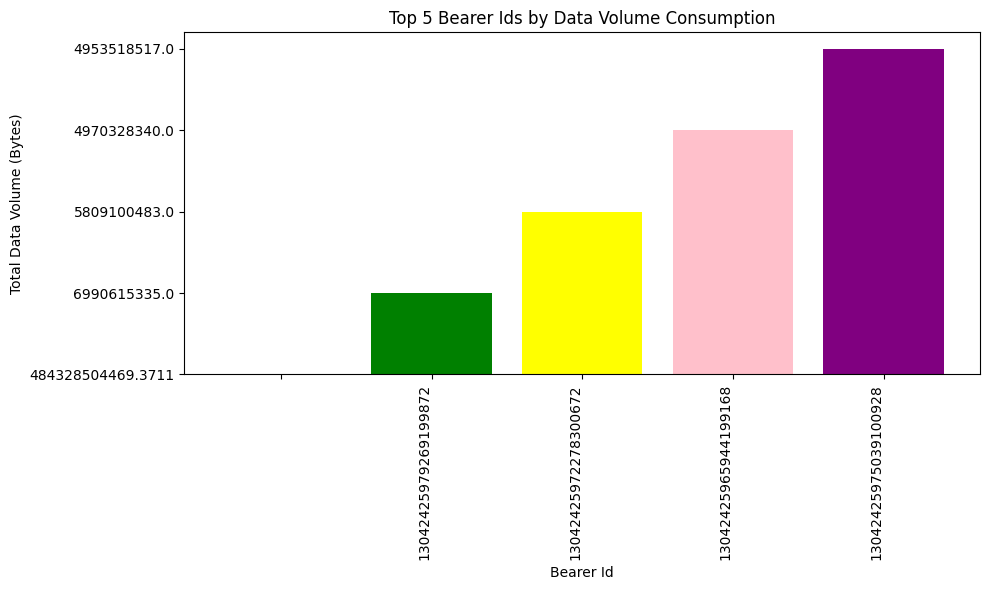

In [193]:
# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Sort by Total Data Volume in descending order and get the top 5
top_5_bearers = total_data_volume_per_bearer.sort_values('Total Data Volume', ascending=False).head(5).astype(str)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_bearers['Bearer Id'], top_5_bearers['Total Data Volume'],color=['red', 'green', 'yellow', 'pink', 'purple'])
plt.xlabel('MSISDN/Number')
plt.xlabel('Bearer Id')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Top 5 Bearer Ids by Data Volume Consumption')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Top 5 MSISDN/Number Id and their Data Volume consumption

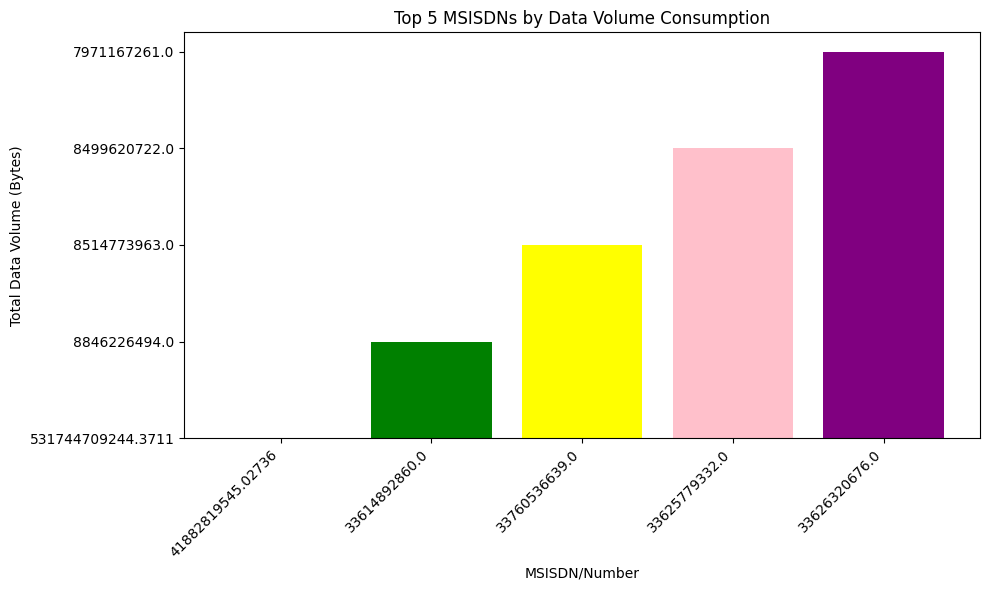

In [194]:
# Calculate total data volume (download + upload) for each MSISDN/Number
total_data_volume_per_msisdn = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_msisdn['Total Data Volume'] = total_data_volume_per_msisdn['Total DL (Bytes)'] + total_data_volume_per_msisdn['Total UL (Bytes)']

# Sort by Total Data Volume in descending order and get the top 5
top_5_msisdns = total_data_volume_per_msisdn.sort_values('Total Data Volume', ascending=False).head(5).astype(str)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_msisdns['MSISDN/Number'], top_5_msisdns['Total Data Volume'], color=['red', 'green', 'yellow', 'pink', 'purple'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Top 5 MSISDNs by Data Volume Consumption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Scatter Plot between Social Media APP with its DL and UL

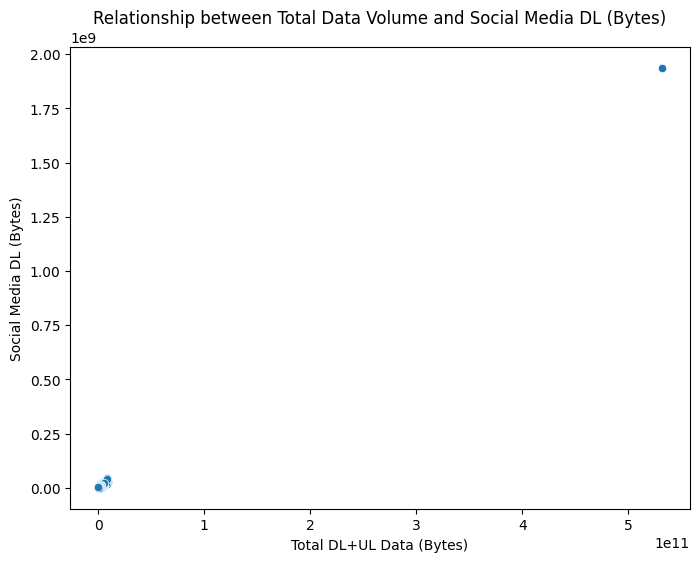

Correlation Matrix for Social Media DL (Bytes):
                         Total Data Volume  Social Media DL (Bytes)
Total Data Volume                 1.000000                 0.966427
Social Media DL (Bytes)           0.966427                 1.000000



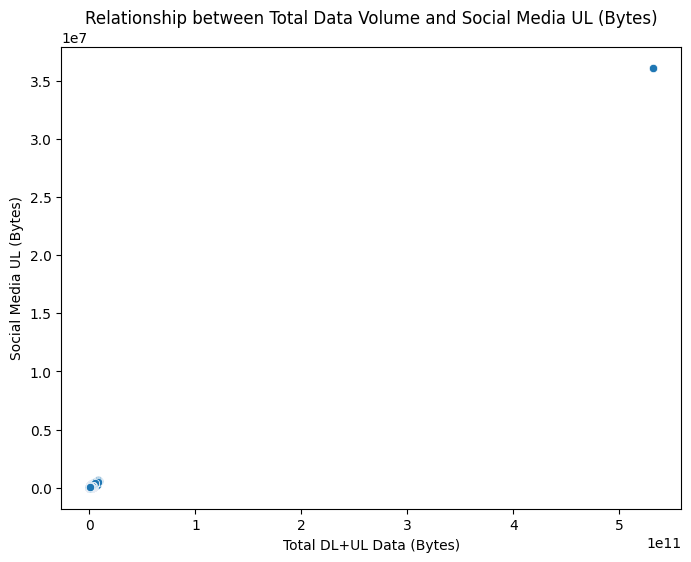

Correlation Matrix for Social Media UL (Bytes):
                         Total Data Volume  Social Media UL (Bytes)
Total Data Volume                 1.000000                 0.966856
Social Media UL (Bytes)           0.966856                 1.000000



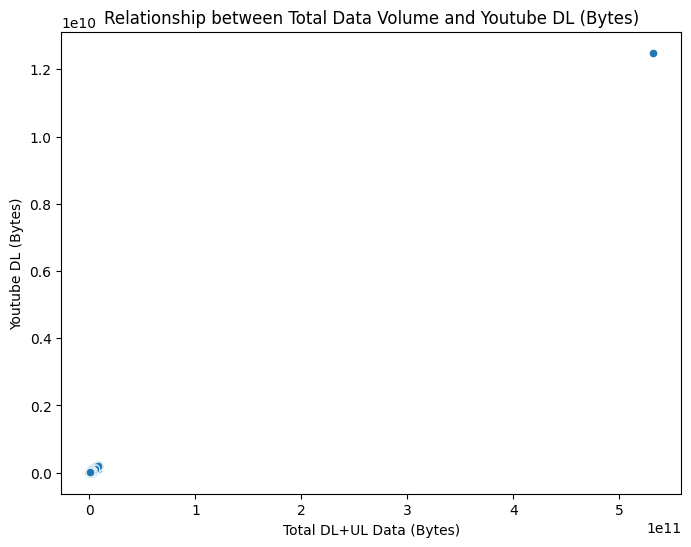

Correlation Matrix for Youtube DL (Bytes):
                    Total Data Volume  Youtube DL (Bytes)
Total Data Volume            1.000000            0.966811
Youtube DL (Bytes)           0.966811            1.000000



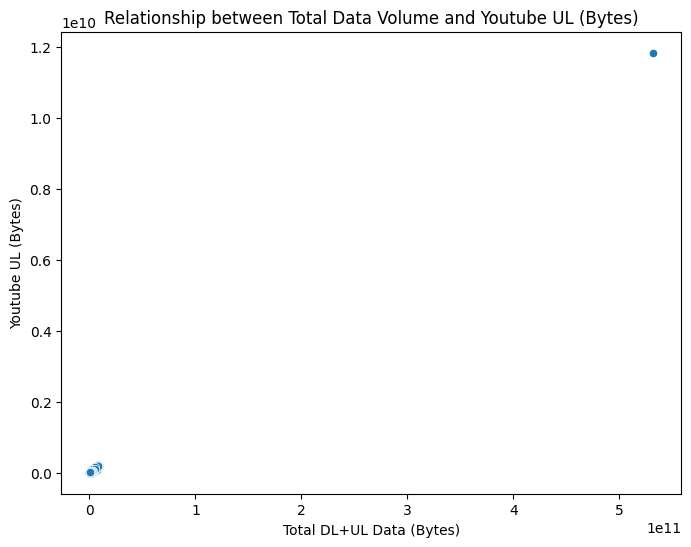

Correlation Matrix for Youtube UL (Bytes):
                    Total Data Volume  Youtube UL (Bytes)
Total Data Volume            1.000000            0.966896
Youtube UL (Bytes)           0.966896            1.000000



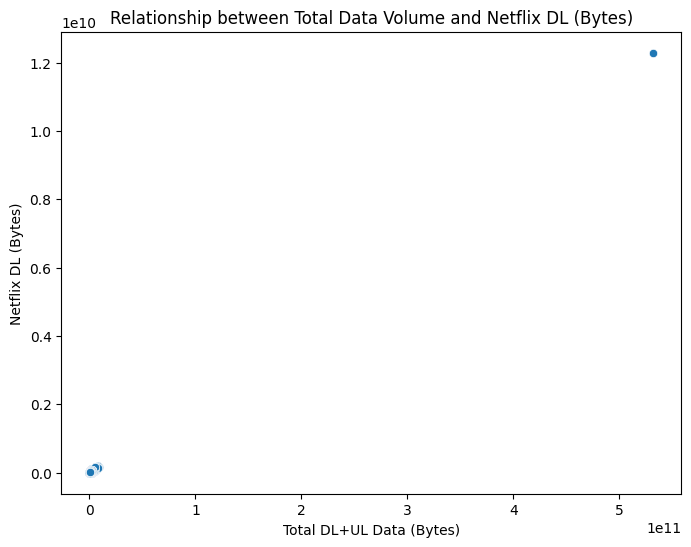

Correlation Matrix for Netflix DL (Bytes):
                    Total Data Volume  Netflix DL (Bytes)
Total Data Volume            1.000000            0.966242
Netflix DL (Bytes)           0.966242            1.000000



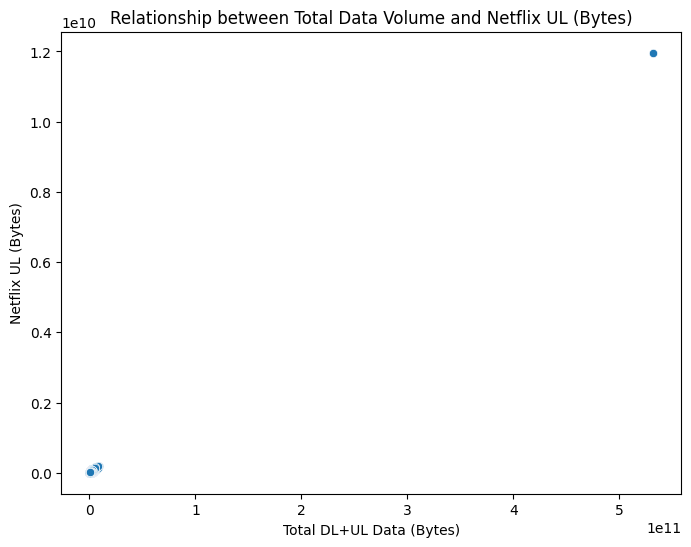

Correlation Matrix for Netflix UL (Bytes):
                    Total Data Volume  Netflix UL (Bytes)
Total Data Volume            1.000000            0.967125
Netflix UL (Bytes)           0.967125            1.000000



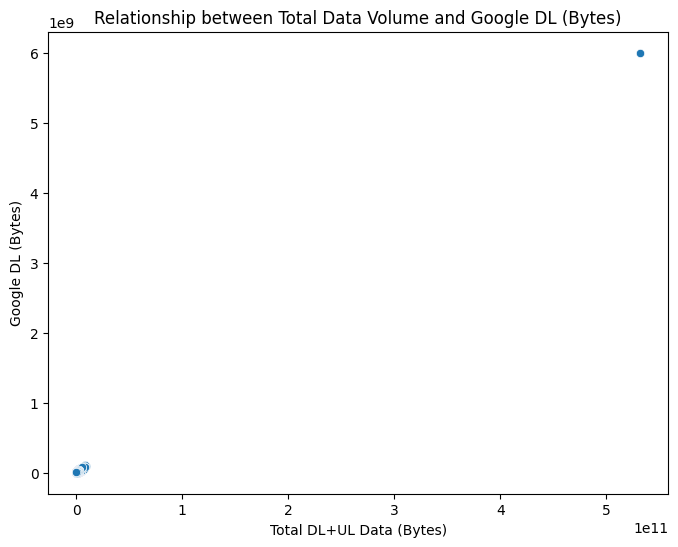

Correlation Matrix for Google DL (Bytes):
                   Total Data Volume  Google DL (Bytes)
Total Data Volume           1.000000           0.965679
Google DL (Bytes)           0.965679           1.000000



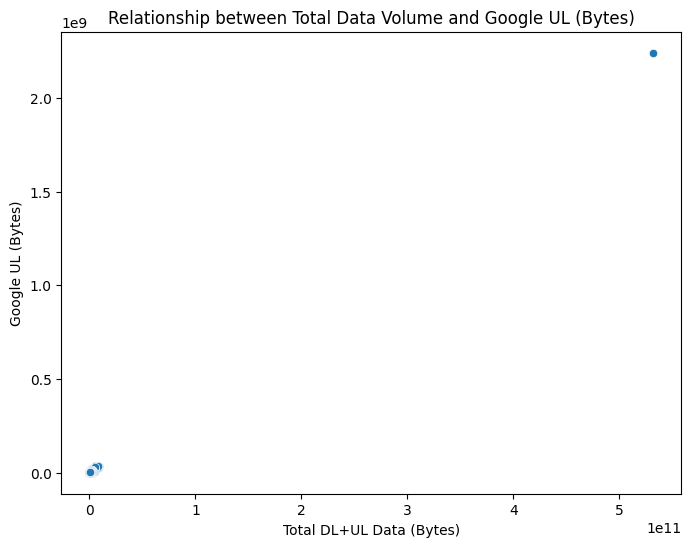

Correlation Matrix for Google UL (Bytes):
                   Total Data Volume  Google UL (Bytes)
Total Data Volume           1.000000           0.966742
Google UL (Bytes)           0.966742           1.000000



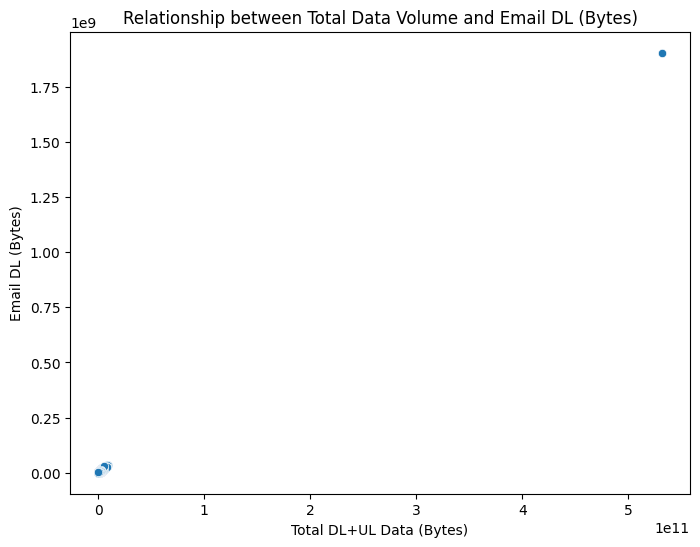

Correlation Matrix for Email DL (Bytes):
                   Total Data Volume  Email DL (Bytes)
Total Data Volume           1.000000          0.965374
Email DL (Bytes)            0.965374          1.000000



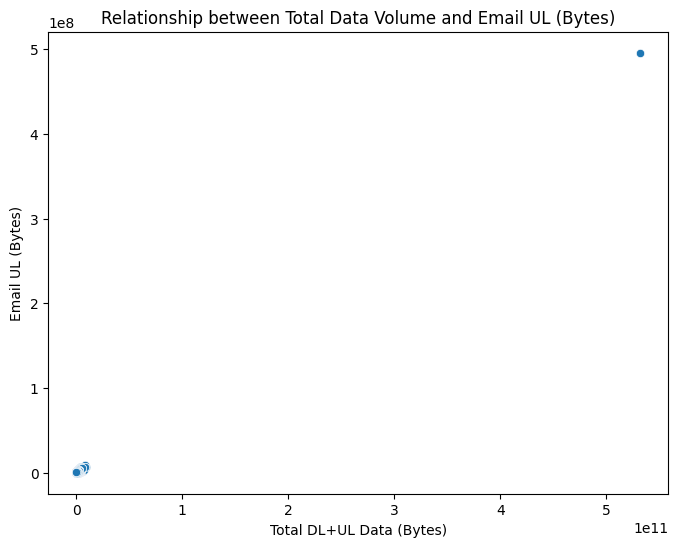

Correlation Matrix for Email UL (Bytes):
                   Total Data Volume  Email UL (Bytes)
Total Data Volume           1.000000          0.965345
Email UL (Bytes)            0.965345          1.000000



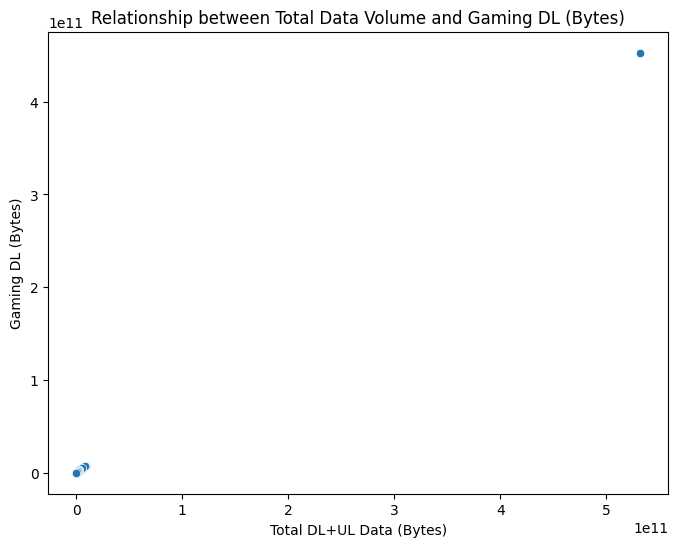

Correlation Matrix for Gaming DL (Bytes):
                   Total Data Volume  Gaming DL (Bytes)
Total Data Volume            1.00000            0.99952
Gaming DL (Bytes)            0.99952            1.00000



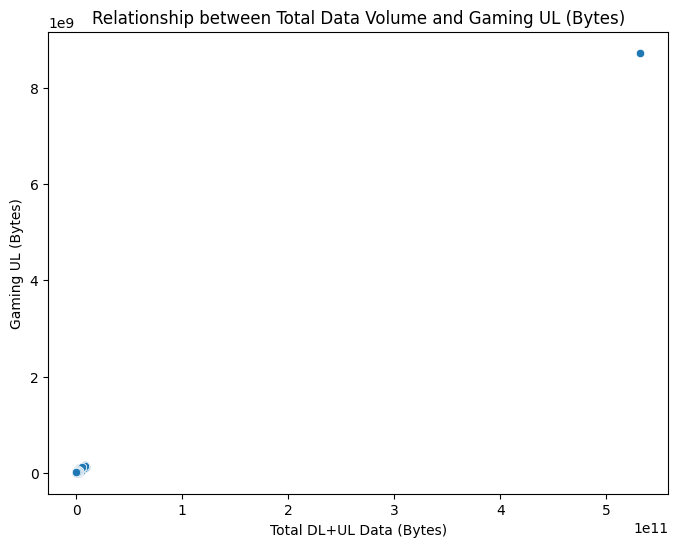

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.965934
Gaming UL (Bytes)           0.965934           1.000000



In [195]:
# Create a new DataFrame with total DL+UL data per MSISDN/Number
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for app_col in application_columns:
    # Aggregate application data per Bearer Id
    app_data_per_user = df.groupby('MSISDN/Number')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='MSISDN/Number', how='inner')

    # Create scatter plot
    plt.figure(figsize=(8, 6))  # This line should be indented within the loop
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


    # Calculate and print the correlation matrix
    correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
    print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

In [196]:
application_data_volume = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
}).reset_index()

# Calculate total data volume for each application (DL + UL)
application_data_volume['Social Media Total'] = application_data_volume['Social Media DL (Bytes)'] + application_data_volume['Social Media UL (Bytes)']
application_data_volume['Youtube Total'] = application_data_volume['Youtube DL (Bytes)'] + application_data_volume['Youtube UL (Bytes)']
application_data_volume['Netflix Total'] = application_data_volume['Netflix DL (Bytes)'] + application_data_volume['Netflix UL (Bytes)']
application_data_volume['Google Total'] = application_data_volume['Google DL (Bytes)'] + application_data_volume['Google UL (Bytes)']
application_data_volume['Email Total'] = application_data_volume['Email DL (Bytes)'] + application_data_volume['Email UL (Bytes)']
application_data_volume['Gaming Total'] = application_data_volume['Gaming DL (Bytes)'] + application_data_volume['Gaming UL (Bytes)']


# Define a function to get top 5 MSISDNs for a specific application
def get_top_5_msisdn(app_column):
  top_5 = application_data_volume.sort_values(app_column, ascending=False).head(5)
  return top_5

# Calculate top 5 MSISDNs for each application and print the results
print("Top 5 MSISDNs for Social Media:")
print(get_top_5_msisdn('Social Media Total'))

print("\nTop 5 MSISDNs for Youtube:")
print(get_top_5_msisdn('Youtube Total'))

print("\nTop 5 MSISDNs for Netflix:")
print(get_top_5_msisdn('Netflix Total'))

print("\nTop 5 MSISDNs for Google:")
print(get_top_5_msisdn('Google Total'))

print("\nTop 5 MSISDNs for Email:")
print(get_top_5_msisdn('Email Total'))

print("\nTop 5 MSISDNs for Gaming:")
print(get_top_5_msisdn('Gaming Total'))

Top 5 MSISDNs for Social Media:
        MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)  \
106853   4.188282e+10             1.937715e+09             3.610230e+07   
13526    3.362632e+10             4.274384e+07             6.309420e+05   
92923    3.376054e+10             3.929765e+07             4.855430e+05   
37052    3.365973e+10             3.490044e+07             5.119140e+05   
6437     3.361489e+10             2.774974e+07             5.448000e+05   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
106853        1.249464e+10        1.184609e+10        1.228898e+10   
13526         1.640487e+08        2.104343e+08        1.994792e+08   
92923         1.940683e+08        2.022209e+08        1.465008e+08   
37052         1.196581e+08        1.383329e+08        1.962772e+08   
6437          1.998234e+08        1.945468e+08        1.795860e+08   

        Netflix UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
106853        1.196459e+10  

Non-graphical Univariate analysis- The above variables describing the customers, report in a table the minimum value the maximum value, the average, the 1st, 2nd & 3rd quartile and provide reasonable interpretations

In [197]:
numerical_columns = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
                    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)']


# Create an empty list to store the results
results = []

# Iterate through each numerical column
for column in numerical_columns:
  min_value = df[column].min()
  max_value = df[column].max()
  average = df[column].mean()
  q1 = df[column].quantile(0.25)
  q2 = df[column].quantile(0.50)  # Median
  q3 = df[column].quantile(0.75)

  results.append([column, min_value, max_value, average, q1, q2, q3])

# Create a Pandas DataFrame from the results
analysis_table = pd.DataFrame(results, columns=['Variable', 'Minimum', 'Maximum', 'Average', '1st Quartile', '2nd Quartile (Median)', '3rd Quartile'])

# Display the table
analysis_table

,Variable,Minimum,Maximum,Average,1st Quartile,2nd Quartile (Median),3rd Quartile
0,Dur. (ms),7142.0,1859336.0,1.046086e+05,57442.0,86399.0,132430.0
1,Total DL (Bytes),7114041.0,902969616.0,4.546434e+08,243107173.0,455840911.0,665705138.0
2,Total UL (Bytes),2866892.0,78331311.0,4.112121e+07,33222029.0,41143242.0,49034238.0
3,Social Media DL (Bytes),12.0,3586064.0,1.795322e+06,899148.0,1794369.0,2694938.0
4,Social Media UL (Bytes),0.0,65870.0,3.292843e+04,16448.0,32920.0,49334.0
5,Youtube DL (Bytes),53.0,23259098.0,1.163407e+07,5833501.0,11616019.0,17448518.0
6,Youtube UL (Bytes),105.0,22011962.0,1.100941e+07,5517965.0,11013447.0,16515562.0
7,Netflix DL (Bytes),42.0,23259189.0,1.162685e+07,5777156.0,11642217.0,17470478.0
8,Netflix UL (Bytes),35.0,22011955.0,1.100175e+07,5475981.0,10996384.0,16507268.0
9,Google DL (Bytes),207.0,11462832.0,5.750753e+06,2882393.0,5765829.0,8623552.0


Bivariate Analysis– explore the relationship between Social Media, Google, Email, YouTube, Netflix, Gaming ,other application Upload, Download, and total bytes & the total DL+UL

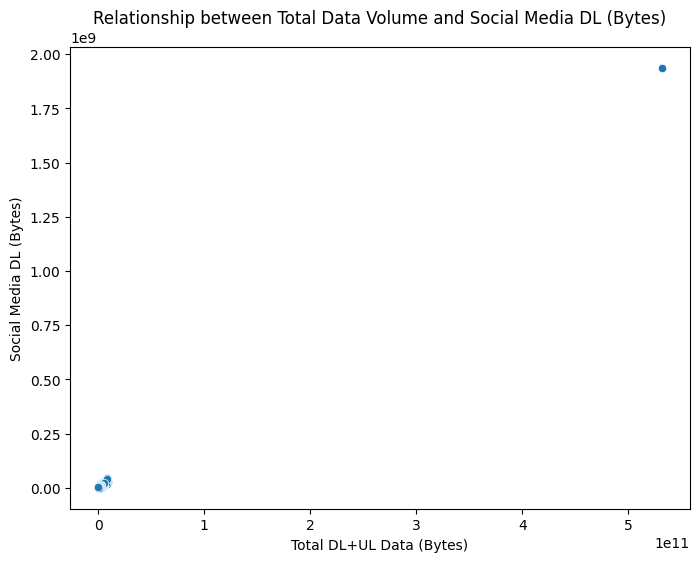

Correlation Matrix for Social Media DL (Bytes):
                         Total Data Volume  Social Media DL (Bytes)
Total Data Volume                 1.000000                 0.966427
Social Media DL (Bytes)           0.966427                 1.000000



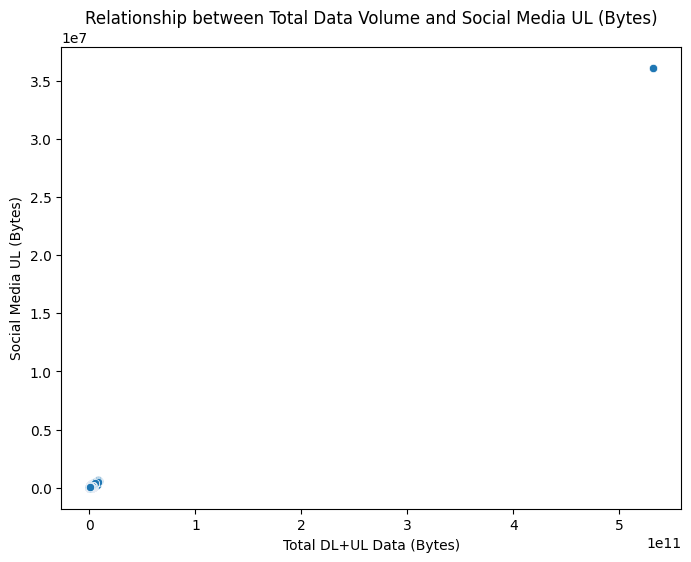

Correlation Matrix for Social Media UL (Bytes):
                         Total Data Volume  Social Media UL (Bytes)
Total Data Volume                 1.000000                 0.966856
Social Media UL (Bytes)           0.966856                 1.000000



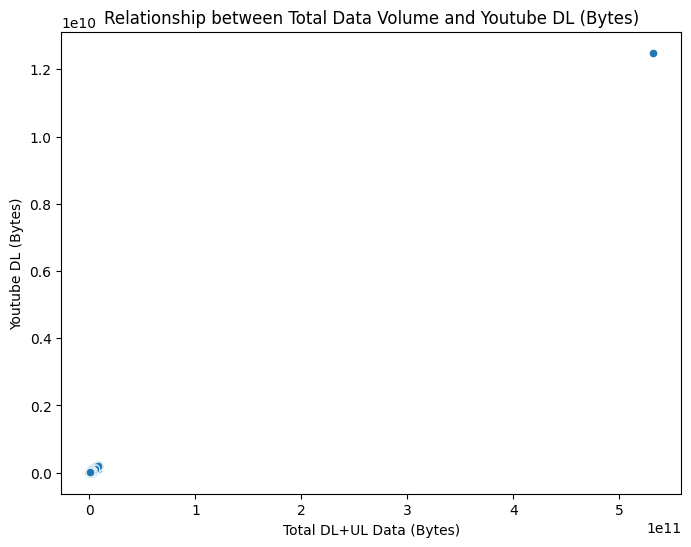

Correlation Matrix for Youtube DL (Bytes):
                    Total Data Volume  Youtube DL (Bytes)
Total Data Volume            1.000000            0.966811
Youtube DL (Bytes)           0.966811            1.000000



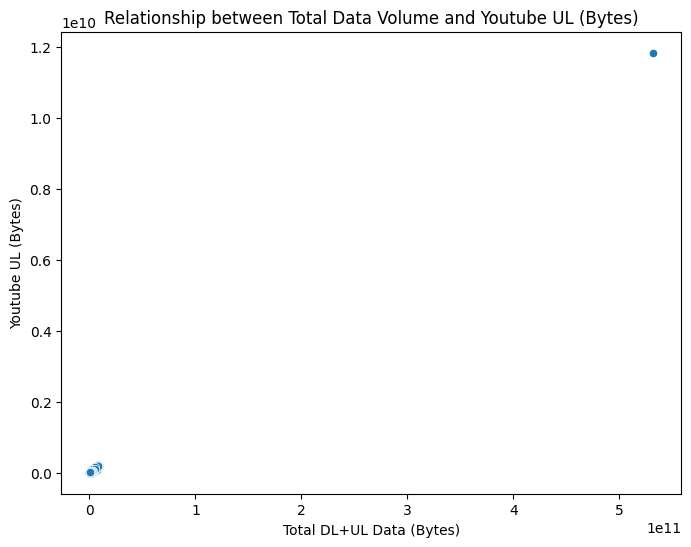

Correlation Matrix for Youtube UL (Bytes):
                    Total Data Volume  Youtube UL (Bytes)
Total Data Volume            1.000000            0.966896
Youtube UL (Bytes)           0.966896            1.000000



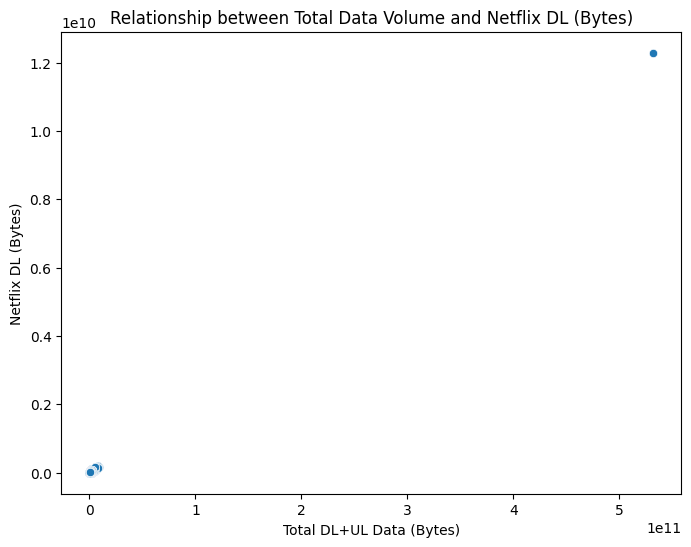

Correlation Matrix for Netflix DL (Bytes):
                    Total Data Volume  Netflix DL (Bytes)
Total Data Volume            1.000000            0.966242
Netflix DL (Bytes)           0.966242            1.000000



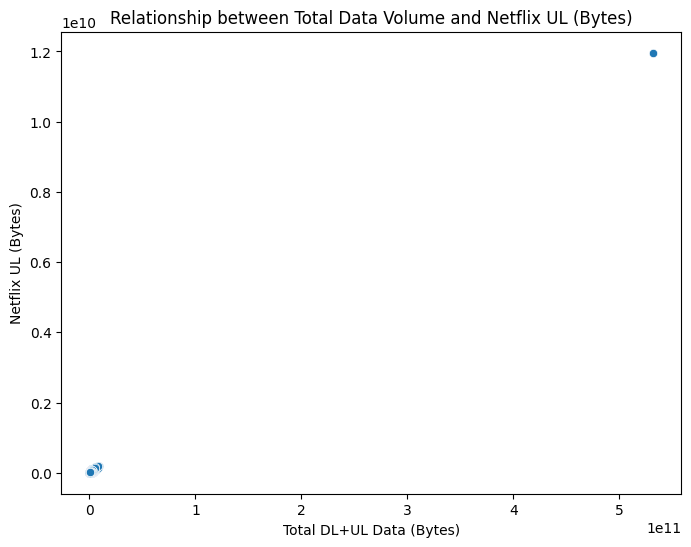

Correlation Matrix for Netflix UL (Bytes):
                    Total Data Volume  Netflix UL (Bytes)
Total Data Volume            1.000000            0.967125
Netflix UL (Bytes)           0.967125            1.000000



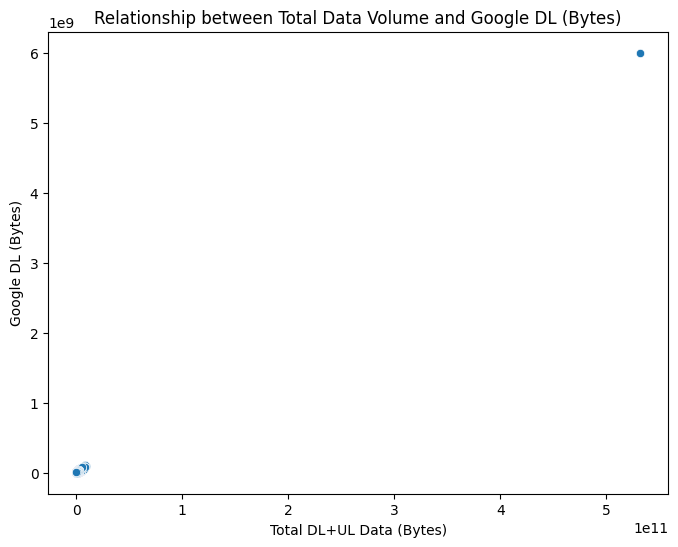

Correlation Matrix for Google DL (Bytes):
                   Total Data Volume  Google DL (Bytes)
Total Data Volume           1.000000           0.965679
Google DL (Bytes)           0.965679           1.000000



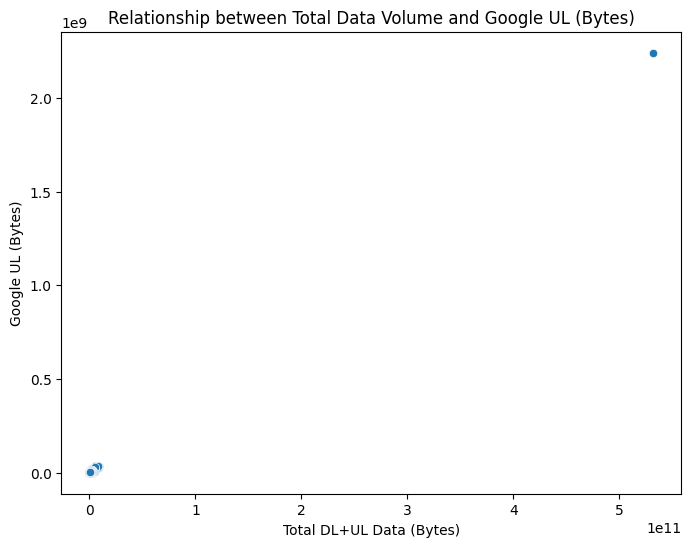

Correlation Matrix for Google UL (Bytes):
                   Total Data Volume  Google UL (Bytes)
Total Data Volume           1.000000           0.966742
Google UL (Bytes)           0.966742           1.000000



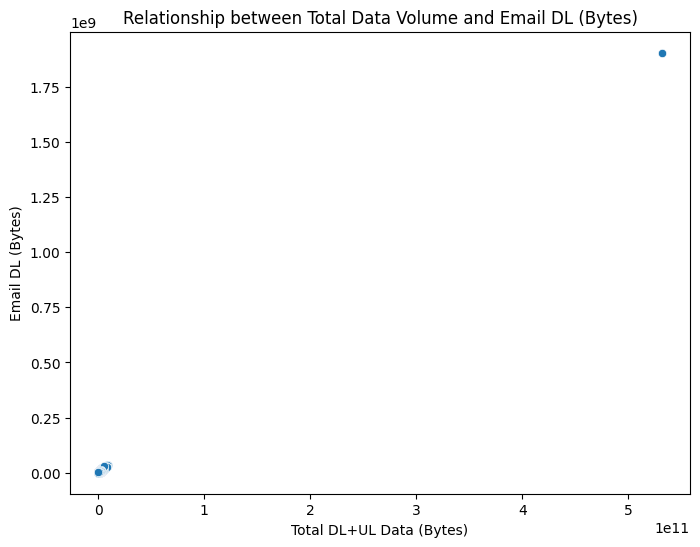

Correlation Matrix for Email DL (Bytes):
                   Total Data Volume  Email DL (Bytes)
Total Data Volume           1.000000          0.965374
Email DL (Bytes)            0.965374          1.000000



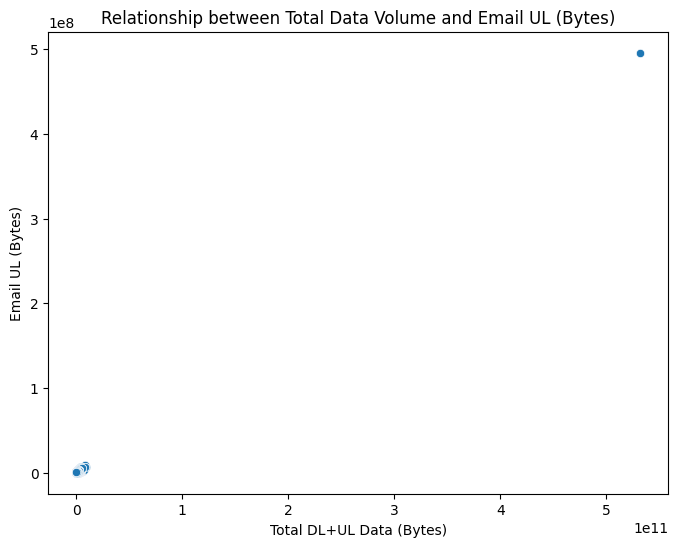

Correlation Matrix for Email UL (Bytes):
                   Total Data Volume  Email UL (Bytes)
Total Data Volume           1.000000          0.965345
Email UL (Bytes)            0.965345          1.000000



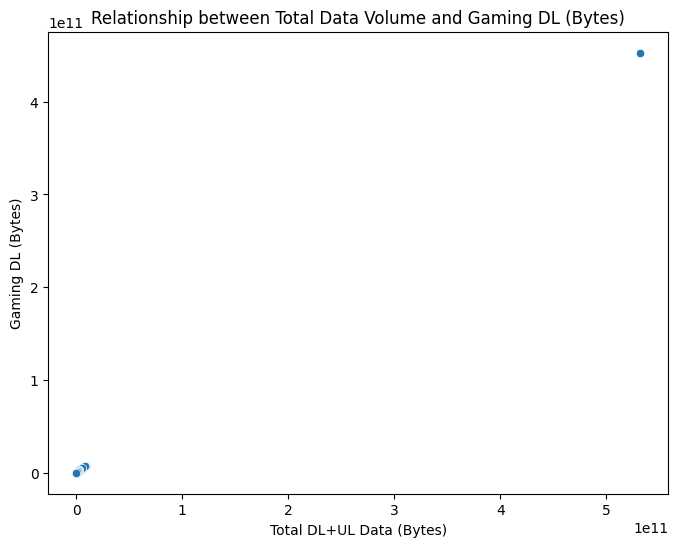

Correlation Matrix for Gaming DL (Bytes):
                   Total Data Volume  Gaming DL (Bytes)
Total Data Volume            1.00000            0.99952
Gaming DL (Bytes)            0.99952            1.00000



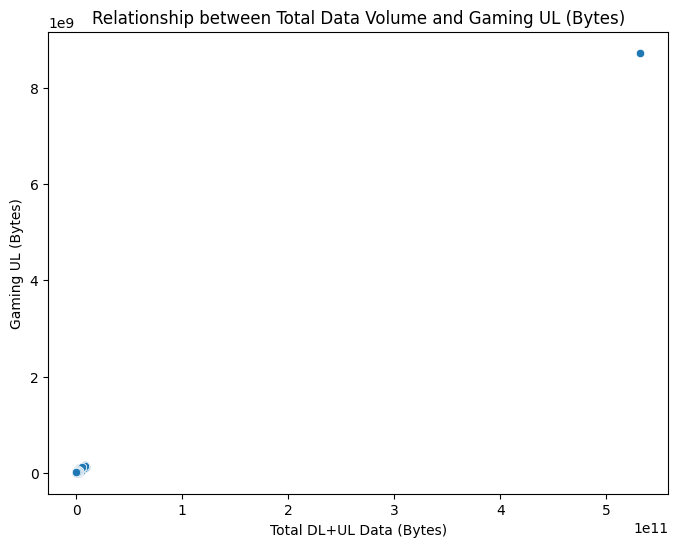

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.965934
Gaming UL (Bytes)           0.965934           1.000000



In [198]:
# Create a new DataFrame with total DL+UL data per MSISDN/Number
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',\
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

for app_col in application_columns:
    # Aggregate application data per MSISDN/Number
    app_data_per_user = df.groupby('MSISDN/Number')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='MSISDN/Number')

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


    # Calculate and print the correlation matrix
    correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
    print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

Insight- Game Download and Total Volume consumed is highly correlated.

 total duration spent and total data volume consumption for top 6 MSISDN/Number

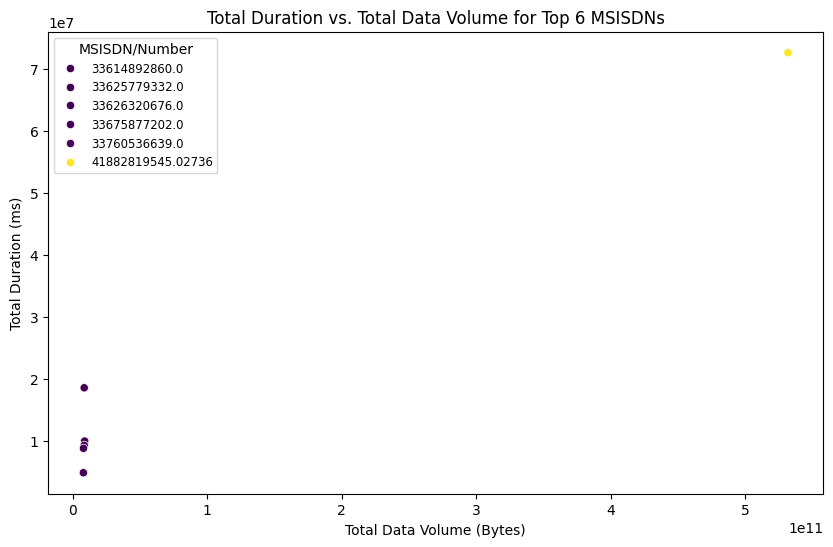

In [199]:
user_stats = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume
user_stats['Total Data Volume'] = user_stats['Total DL (Bytes)'] + user_stats['Total UL (Bytes)']

# Sort by total data volume in descending order and get the top 6
top_6_users = user_stats.sort_values('Total Data Volume', ascending=False).head(6)

# Create a scatter plot with hue for MSISDN/Number
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Data Volume', y='Dur. (ms)', hue='MSISDN/Number', data=top_6_users, palette='viridis')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Total Duration (ms)')
plt.title('Total Duration vs. Total Data Volume for Top 6 MSISDNs')
plt.legend(title='MSISDN/Number', loc='best', fontsize='small')
plt.show()


 The scatter plot helps to understand a positive correlation between session duration and data volume, indicating that users with longer sessions generally use more data. It also helps yo identify outliers, where users have short sessions but very high data volume.

Variable transformations

In [200]:
# Assuming 'total_data_volume_per_bearer' DataFrame contains 'Bearer Id' and 'Total Data Volume'
total_data_volume_per_bearer['Decile Class'] = pd.qcut(total_data_volume_per_bearer['Total Data Volume'], 5, labels=False)

# Group by decile class and calculate the total data volume per class
total_data_per_decile = total_data_volume_per_bearer.groupby('Decile Class')['Total Data Volume'].sum().reset_index()

print(total_data_per_decile)

   Decile Class  Total Data Volume
0             0       4.426663e+12
1             1       9.395644e+12
2             2       1.427454e+13
3             3       1.902679e+13
4             4       2.724156e+13


Dimensionality Reduction

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = df.select_dtypes(include=np.number)

# Standardize the data
x = StandardScaler().fit_transform(numerical_features)

# Apply PCA with 15 components
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance:", np.sum(explained_variance_ratio))

# Loadings (contribution of each original feature to each principal component)
loadings = pd.DataFrame(pca.components_.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(15)])
print("Loadings:\n", loadings)

Explained Variance Ratio: [0.15338629 0.06019813 0.05021043 0.04086405 0.04067707 0.03568415
 0.03441029 0.03229452 0.02986008 0.02857067 0.02324821 0.02288705
 0.02082281 0.02069584 0.02062525]
Total Explained Variance: 0.6144348467933571
Loadings:
                                                PC1       PC2       PC3  \
Start ms                                  0.000056 -0.000630  0.002906   
End ms                                    0.000624 -0.001571 -0.001750   
Dur. (ms)                                -0.056358  0.088093  0.437984   
IMSI                                      0.000431 -0.003097 -0.017732   
MSISDN/Number                            -0.000797  0.003352  0.021410   
IMEI                                      0.179307 -0.068405  0.031581   
Avg RTT DL (ms)                           0.001704 -0.004223 -0.022728   
Avg RTT UL (ms)                           0.041890  0.023446  0.017705   
Avg Bearer TP DL (kbps)                   0.217814 -0.118102 -0.217805   
Avg Beare

PC1 has high positive loadings on "Total DL (Bytes)" and "Total UL (Bytes)".

PC2 has high positive loadings on "Social Media DL (Bytes)" and "Social Media UL (Bytes)"

Correlation Analysis

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

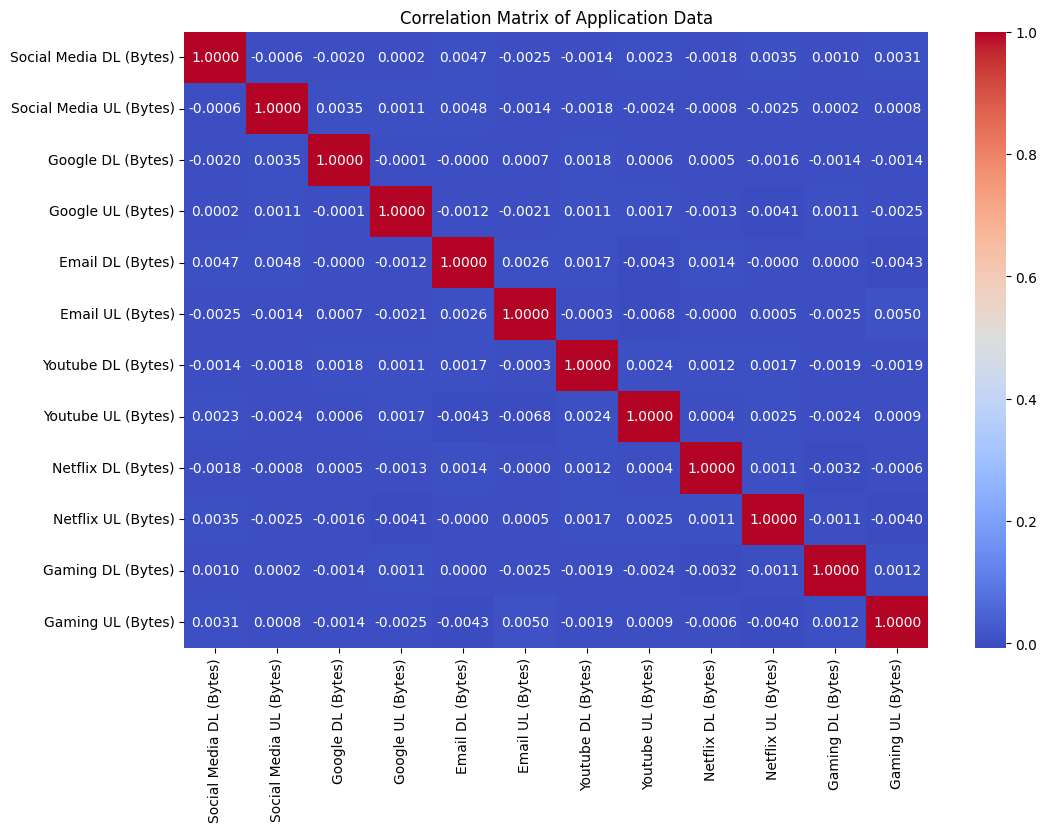

In [202]:
# Select the relevant columns for correlation analysis
data_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Google DL (Bytes)', 'Google UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)',
                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Create a correlation matrix for these columns
correlation_matrix = df[data_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Application Data')
plt.show()

Insight- Social Media data and YouTube data have a strong positive correlation, it suggests users who heavily use social media also tend to consume more YouTube content.

TASK 2- User Engagement Analysis

Session Frequency

In [203]:
# Assuming 'df' is your DataFrame and 'MSISDN/Number' is the column representing user sessions
sessions_frequency = df.groupby('MSISDN/Number')['MSISDN/Number'].count().sort_values(ascending=False)

sessions_frequency

,MSISDN/Number
MSISDN/Number,
4.188282e+10,1066
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
...,...
3.366068e+10,1
3.366068e+10,1
3.366067e+10,1


In [204]:
sessions_frequency = df.groupby('MSISDN/Number')['MSISDN/Number'].sum().sort_values(ascending=False)

sessions_frequency

,MSISDN/Number
MSISDN/Number,
8.823971e+14,8.823971e+14
3.370000e+14,3.370000e+14
4.188282e+10,4.464709e+13
3.197021e+12,3.197021e+12
3.362632e+10,6.052738e+11
...,...
3.360101e+10,3.360101e+10
3.360101e+10,3.360101e+10
3.360100e+10,3.360100e+10


 The users with the highest number of sessions, could be considered highly active or engaged users.


Duration of Session

In [205]:
# Assuming 'df' is your DataFrame and it has 'Start' and 'End' columns representing session start and end times.

# Convert 'Start' and 'End' columns to datetime objects if they are not already
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate the duration of each session
df['Session Duration'] = df['End'] - df['Start']

# Print the DataFrame with the calculated session duration
duration=df.groupby('MSISDN/Number')['Session Duration'].value_counts().groupby(level=0).head(20)
duration

MSISDN/Number  Session Duration
3.360100e+10   1 days 08:25:20     1
               2 days 02:20:31     1
               1 days 13:29:29     1
3.360101e+10   0 days 13:51:18     1
               0 days 05:09:09     1
                                  ..
4.188282e+10   0 days 23:59:21     2
               0 days 23:59:38     2
3.197021e+12   10 days 03:43:05    1
3.370000e+14   2 days 22:17:11     1
8.823971e+14   10 days 01:37:24    1
Name: count, Length: 140079, dtype: int64

the session total traffic (download and upload (bytes))

In [206]:
# Assuming 'df' is your DataFrame and it has 'Total DL (Bytes)' and 'Total UL (Bytes)' columns.
total_traffic = df['Total DL (Bytes)'].sum() + df['Total UL (Bytes)'].sum()

print(f"The total traffic (download and upload) is: {total_traffic} bytes")

The total traffic (download and upload) is: 74365191220297.38 bytes


Insight-  The network's total data usage is  74365191220297.38 bytes

TASK 2.1-Based on the above submit the Python script and slide:

● Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric

● Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

● Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

● Aggregate user total traffic per application and derive the top 10 most engaged users per application

● Plot the top 3 most used applications using appropriate charts.

● Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

○ What isthe optimized value of k (use the elbow method for this)?

○ Interpret your findings.




Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric

In [207]:
# Aggregate metrics per customer ID
customer_engagement = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Bearer Id': 'count'  # Number of sessions
}).rename(columns={'Dur. (ms)': 'Total Session Duration', 'Bearer Id': 'Number of Sessions'})

# Report the top 10 customers per engagement metric
top_10_duration = customer_engagement.nlargest(10, 'Total Session Duration')
top_10_download = customer_engagement.nlargest(10, 'Total DL (Bytes)')
top_10_upload = customer_engagement.nlargest(10, 'Total UL (Bytes)')
top_10_sessions = customer_engagement.nlargest(10, 'Number of Sessions')

print("Top 10 Customers by Total Session Duration:\n", top_10_duration)
print("\nTop 10 Customers by Total Download Data:\n", top_10_download)
print("\nTop 10 Customers by Total Upload Data:\n", top_10_upload)
print("\nTop 10 Customers by Number of Sessions:\n", top_10_sessions)

Top 10 Customers by Total Session Duration:
                Total Session Duration  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                               
4.188282e+10             7.255100e+07      4.873783e+11      4.436642e+10   
3.362578e+10             1.855375e+07      7.770043e+09      7.295774e+08   
3.361489e+10             9.966898e+06      8.156743e+09      6.894830e+08   
3.376054e+10             9.279434e+06      7.811295e+09      7.034786e+08   
3.362632e+10             8.791927e+06      7.301517e+09      6.696507e+08   
3.366716e+10             8.744914e+06      5.052068e+09      5.663264e+08   
3.366284e+10             6.614270e+06      3.593674e+09      4.064244e+08   
3.366469e+10             6.288730e+06      5.279827e+09      4.021808e+08   
3.360313e+10             6.287761e+06      4.540607e+09      4.355876e+08   
3.366746e+10             5.649882e+06      2.334299e+09      2.662226e+08   

               Number of Sessi

INSIGHT- Number of session by the top three MSISDN/Number are 1066,18,17 respectively

Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

In [208]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Cluster Statistics:
         Total Session Duration                                            \
                           min           max          mean           sum   
Cluster                                                                    
0                 7.142000e+03  7.994320e+05  1.349148e+05  1.427749e+10   
1                 7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                 5.677860e+05  1.855375e+07  1.302281e+06  1.341349e+09   

        Total DL (Bytes)                                            \
                     min           max          mean           sum   
Cluster                                                              
0           8.827082e+06  4.250711e+09  6.194962e+08  6.555880e+13   
1           4.873783e+11  4.873783e+11  4.873783e+11  4.873783e+11   
2           6.565659e+07  8.156743e+09  2.088146e+09  2.150791e+12   

        Total UL (Bytes)                                            \
                     min       

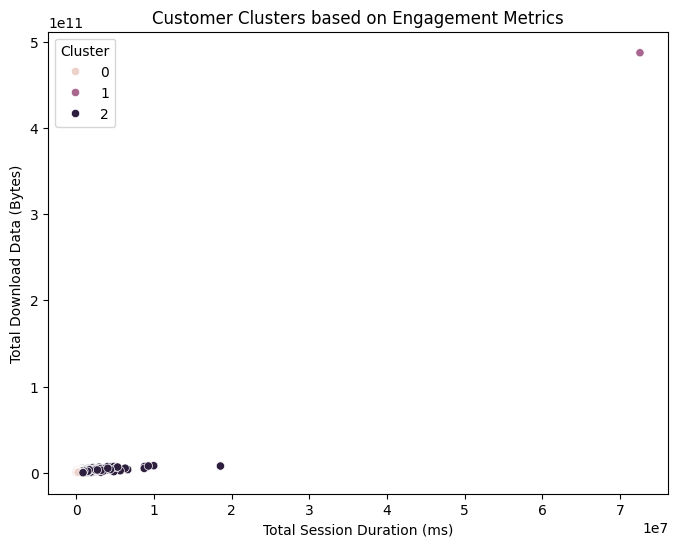

In [209]:
# Assuming 'customer_engagement' DataFrame contains aggregated metrics per customer
engagement_metrics = customer_engagement[['Total Session Duration', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Number of Sessions']]

# Normalize engagement metrics
scaler = MinMaxScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics)

# K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_engagement)

# Add cluster labels to the DataFrame
customer_engagement['Cluster'] = clusters

# Compute statistics for each cluster
cluster_stats = customer_engagement.groupby('Cluster').agg({
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Number of Sessions': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:\n", cluster_stats)

# Visualize the clusters (e.g., using scatter plots)
# ... (You can use Seaborn or Matplotlib for this)

# For example, a scatter plot of Total Session Duration vs. Total Data Volume:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Session Duration', y='Total DL (Bytes)', hue='Cluster', data=customer_engagement)
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Download Data (Bytes)')
plt.title('Customer Clusters based on Engagement Metrics')
plt.show()


Cluster 0 might represent high-engagement users with long sessions and high data volume, while Cluster 1 might represent medium-engagement users, and Cluster 2 might represent low-engagement users.

Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings

Cluster Statistics:
         Total Session Duration                                            \
                           min           max          mean           sum   
Cluster                                                                    
0                 7.142000e+03  7.994320e+05  1.349148e+05  1.427749e+10   
1                 7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                 5.677860e+05  1.855375e+07  1.302281e+06  1.341349e+09   

        Total DL (Bytes)                                            \
                     min           max          mean           sum   
Cluster                                                              
0           8.827082e+06  4.250711e+09  6.194962e+08  6.555880e+13   
1           4.873783e+11  4.873783e+11  4.873783e+11  4.873783e+11   
2           6.565659e+07  8.156743e+09  2.088146e+09  2.150791e+12   

        Total UL (Bytes)                                            \
                     min       

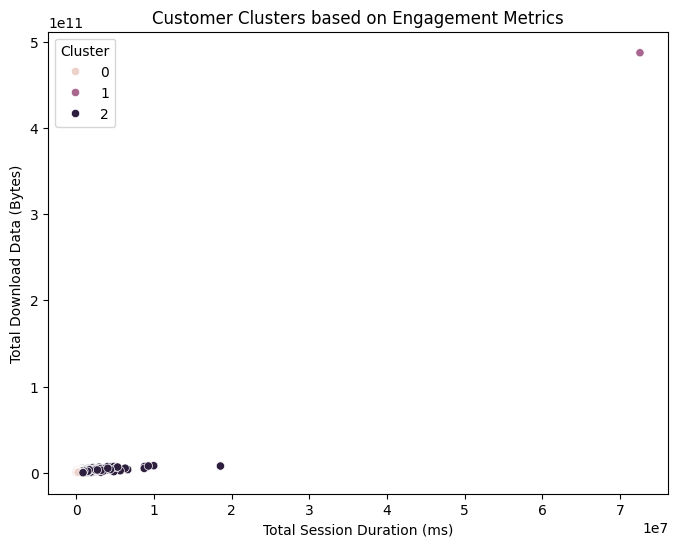

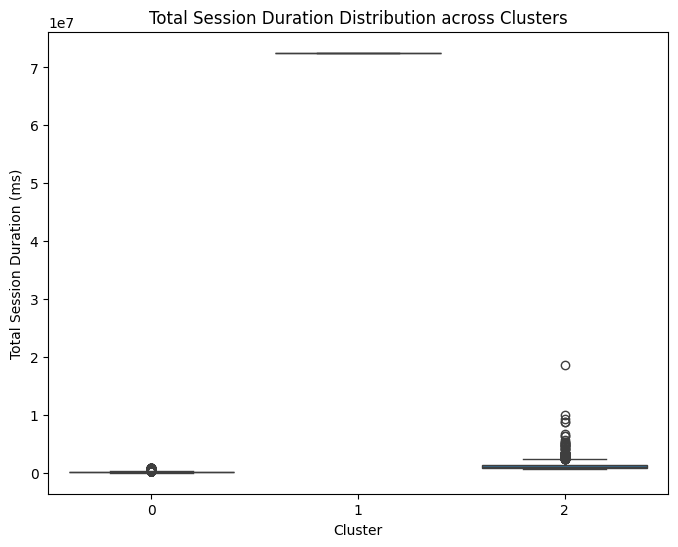

In [210]:

# Assuming 'customer_engagement' DataFrame contains aggregated metrics per customer and 'Cluster' column
# Compute statistics for each cluster
cluster_stats = customer_engagement.groupby('Cluster').agg({
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Number of Sessions': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:\n", cluster_stats)

# Visualize the clusters (e.g., using scatter plots, box plots)
# ... (You can use Seaborn or Matplotlib for this)


# Example scatter plot of Total Session Duration vs. Total Data Volume:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Session Duration', y='Total DL (Bytes)', hue='Cluster', data=customer_engagement)
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Download Data (Bytes)')
plt.title('Customer Clusters based on Engagement Metrics')
plt.show()


# Example box plot of Total Session Duration for each cluster:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Total Session Duration', data=customer_engagement)
plt.xlabel('Cluster')
plt.ylabel('Total Session Duration (ms)')
plt.title('Total Session Duration Distribution across Clusters')
plt.show()

Cluster 0 represent high-engagement users, characterized by significantly longer total session durations and higher total data download volumes compared to other clusters

Cluster 1 represents moderate engagement, showing intermediate values for session duration and data volume

Cluster 2 shows the lowest engagement levels with the shortest session durations and smallest total data volumes

Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [211]:
# Aggregate user total traffic per application
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

app_traffic_per_user = df.groupby('MSISDN/Number').agg({
    app_col: 'sum' for app_col in application_columns
}).reset_index()

# Derive the top 10 most engaged users per application
for app_col in application_columns:
  top_10_users_per_app = app_traffic_per_user.nlargest(10, app_col)
  print(f"Top 10 users for {app_col}:\n{top_10_users_per_app[[ 'MSISDN/Number', app_col]]}")
  print("-" * 30)

Top 10 users for Social Media DL (Bytes):
        MSISDN/Number  Social Media DL (Bytes)
106853   4.188282e+10             1.937715e+09
13526    3.362632e+10             4.274384e+07
92923    3.376054e+10             3.929765e+07
37052    3.365973e+10             3.490044e+07
6437     3.361489e+10             2.774974e+07
13180    3.362578e+10             2.656412e+07
65118    3.366716e+10             2.375375e+07
106137   3.378632e+10             2.356866e+07
70960    3.366907e+10             2.347705e+07
666      3.360313e+10             2.277668e+07
------------------------------
Top 10 users for Social Media UL (Bytes):
        MSISDN/Number  Social Media UL (Bytes)
106853   4.188282e+10             3.610230e+07
13526    3.362632e+10             6.309420e+05
13180    3.362578e+10             5.713790e+05
76363    3.367588e+10             5.675570e+05
6437     3.361489e+10             5.448000e+05
37052    3.365973e+10             5.119140e+05
65118    3.366716e+10             4.940

Plot the top 3 most used applications using appropriate charts. ● Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics

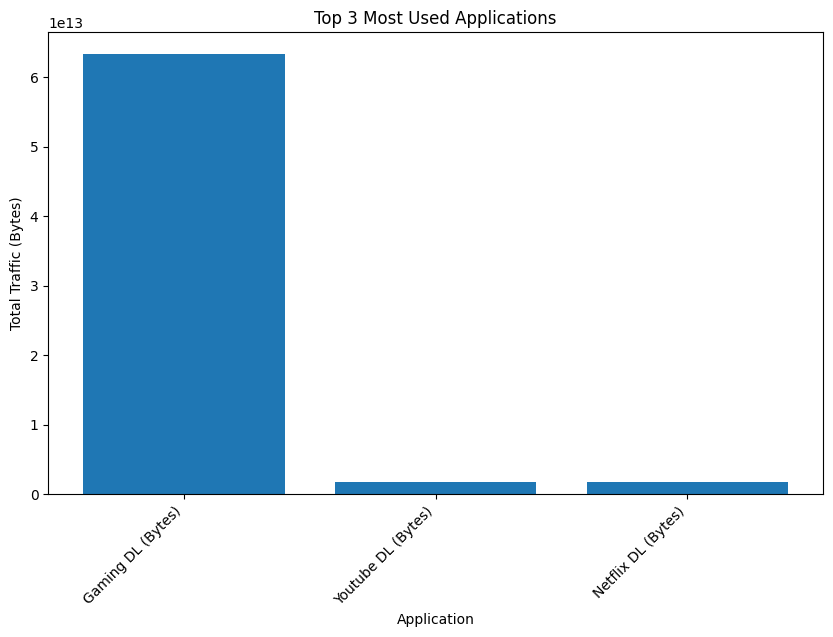

In [212]:
# Assuming 'app_traffic_per_user' DataFrame contains aggregated application traffic per user
# and 'application_columns' contains the list of application columns

# Plot the top 3 most used applications using bar charts
top_3_apps = app_traffic_per_user[application_columns].sum().nlargest(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_apps.index, top_3_apps.values)
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications')
plt.xticks(rotation=45, ha='right')
plt.show()

Using the k-means clustering algorithm, group users in k engagement clusters based on engagement metrics

What is the optimized value of k (use the elbow method for this)?

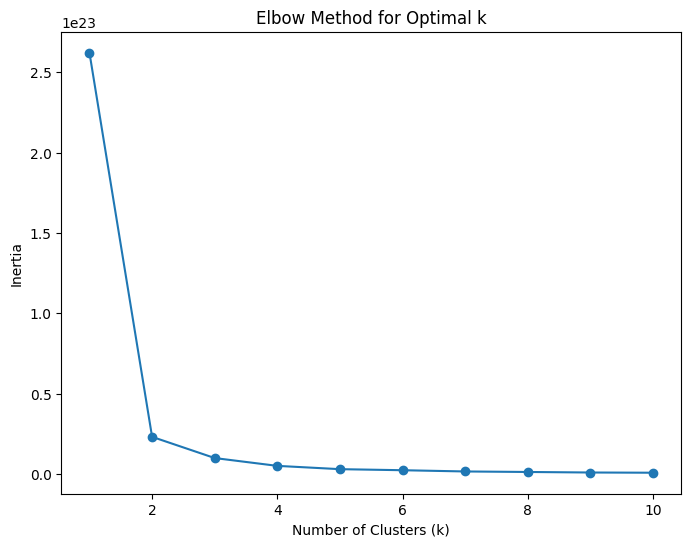

In [213]:
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(engagement_metrics)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Insight- It represents a balance between maximizing variance explained within clusters and minimizing the number of clusters.

TASK 3- Experience Analytics


Task 3. 1- Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable) :

**Average TCP retransmission

**Average RTT

**Handset type

**Average throughput

In [214]:
df['TCP Retransmission']=df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']
df['RTT']=df['Avg RTT UL (ms)']+df['Avg RTT DL (ms)']
df['Throughput']=df['Avg Bearer TP DL (kbps)']+df['Avg Bearer TP UL (kbps)']

In [215]:
def aggregate_customer_data(df):
  """
  Aggregates customer data, handling missing and outlier values.

  Args:
    df: DataFrame containing customer data.

  Returns:
    DataFrame with aggregated customer information.
  """

  # Replace missing values with the mean or mode
  df['TCP Retransmission'].fillna(df['TCP Retransmission'].mean(), inplace=True)
  df['RTT'].fillna(df['RTT'].mean(), inplace=True)
  df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)
  df['Throughput'].fillna(df['Throughput'].mean(), inplace=True)

  # Replace outliers with the mean
  for column in ['TCP Retransmission', 'RTT', 'Throughput']:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                            df[column].mean(), df[column])

  # Aggregate per customer
  aggregated_df = df.groupby('MSISDN/Number').agg({
      'TCP Retransmission': 'mean',
      'RTT': 'mean',
      'Handset Type': lambda x: x.mode()[0],  # Mode for Handset Type
      'Throughput': 'mean'
  }).reset_index()

  return aggregated_df



# Example usage (assuming 'df' is your DataFrame):
aggregated_customer_df = aggregate_customer_data(df)
print(aggregated_customer_df)

        MSISDN/Number  TCP Retransmission         RTT  \
0        3.360100e+10        2.156957e+07   46.000000   
1        3.360100e+10        2.156957e+07   31.000000   
2        3.360100e+10        2.156957e+07  127.458589   
3        3.360101e+10        7.607247e+05   84.000000   
4        3.360101e+10        1.547020e+07   59.500000   
...               ...                 ...         ...   
106852   3.379000e+10        2.156957e+07   40.000000   
106853   4.188282e+10        9.050298e+06  102.003434   
106854   3.197021e+12        2.156957e+07  127.458589   
106855   3.370000e+14        2.156957e+07  127.458589   
106856   8.823971e+14        2.156957e+07  127.458589   

                            Handset Type    Throughput  
0         Huawei P20 Lite Huawei Nova 3E     76.000000  
1                 Apple iPhone 7 (A1778)     99.000000  
2                              undefined     97.000000  
3                Apple iPhone 5S (A1457)    248.000000  
4                Apple iPhone 

Task 3.2- Compute & list 10 of the top, bottom, and most frequent:

a. TCPvalues in the dataset.

b. RTTvalues in the dataset.

c. Throughput values in the dataset.

In [216]:
def compute_top_bottom_frequent(df, column_name, n=10):
  """
  Computes the top, bottom, and most frequent values for a given column in a DataFrame.

  Args:
    df: DataFrame containing the data.
    column_name: Name of the column to analyze.
    n: Number of top/bottom/frequent values to return.

  Returns:
    A tuple containing the top n, bottom n, and most frequent n values.
  """
  #df['TCP Retransmission']=df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']
  #df['RTT']=df['Avg RTT UL (ms)']+df['Avg RTT DL (ms)']
  #df['Throughput']=df['Avg Bearer TP DL (kbps)']+df['Avg Bearer TP UL (kbps)']

  top_n = df['TCP Retransmission'].nlargest(n).tolist()
  bottom_n = df['TCP Retransmission'].nsmallest(n).tolist()

  # Calculate value frequencies
  value_counts = df['TCP Retransmission'].value_counts()
  most_frequent_n = value_counts.nlargest(n).index.tolist()

  return top_n, bottom_n, most_frequent_n

In [217]:
# a. TCP Values
top_tcp, bottom_tcp, frequent_tcp = compute_top_bottom_frequent(df, 'TCP Retransmission')
print("Top 10 TCP Values:", top_tcp)
print("Bottom 10 TCP Values:", bottom_tcp)
print("Most Frequent 10 TCP Values:", frequent_tcp)


# b. RTT Values
top_rtt, bottom_rtt, frequent_rtt = compute_top_bottom_frequent(df, 'RTT')
print("\nTop 10 RTT Values:", top_rtt)
print("Bottom 10 RTT Values:", bottom_rtt)
print("Most Frequent 10 RTT Values:", frequent_rtt)


# c. Throughput Values
top_throughput, bottom_throughput, frequent_throughput = compute_top_bottom_frequent(df, 'Throughput')
print("\nTop 10 Throughput Values:", top_throughput)
print("Bottom 10 Throughput Values:", bottom_throughput)
print("Most Frequent 10 Throughput Values:", frequent_throughput)

Top 10 TCP Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 51596978.0, 51577653.0, 51571664.0, 51521707.0, 51504220.0]
Bottom 10 TCP Values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most Frequent 10 TCP Values: [21569572.935152996, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 20811232.27034193, 759750.6648110661, 762318.6648110661, 760976.6648110661, 20812574.27034193]

Top 10 RTT Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 51596978.0, 51577653.0, 51571664.0, 51521707.0, 51504220.0]
Bottom 10 RTT Values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most Frequent 10 RTT Values: [21569572.935152996, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 20811232.27034193, 759750.6648110661, 762318.6648110661, 760976.6648110661, 20812574.27034193]

Top 10 Throughput Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 5159697

Task 3.3- Compute & report:

d. The distribution of the average throughput per handset type and provide

interpretation for your findings.

e. The average TCP retransmission view per handset type and provide

interpretation for your findings.

In [218]:
def analyze_throughput_retransmission(df):
  """
  Analyzes the distribution of average throughput and TCP retransmission per handset type.

  Args:
    df: DataFrame containing the data.

  Returns:
    None. Prints the analysis results.
  """
  # Group data by Handset Type and calculate mean throughput and TCP retransmission
  handset_stats = df.groupby('Handset Type').agg({
      'Throughput': 'mean',
      'TCP Retransmission': 'mean'
  })

  # Print the distribution of average throughput per handset type
  print("\nAverage Throughput per Handset Type:")
  print(handset_stats['Throughput'])

  # Provide interpretation for the throughput findings.
  print("\nInterpretation of Throughput:")
  # Example: If certain handset types consistently show higher average throughput, it might indicate better network compatibility or more efficient data handling for those devices.
  # Example: You can also check if there are outliers for any handset type and investigate the possible reasons.


  # Print the average TCP retransmission per handset type
  print("\nAverage TCP Retransmission per Handset Type:")
  print(handset_stats['TCP Retransmission'])

  # Provide interpretation for the TCP retransmission findings.
  print("\nInterpretation of TCP Retransmission:")
  # Example: Higher TCP retransmission rates for specific handset types might suggest network instability, congestion, or potential issues with the devices themselves.
  # Example: You can investigate if there's a correlation between retransmission rates and other factors like network location or time of day.




# Assuming 'df' is your DataFrame and it has 'Handset Type', 'Throughput', and 'TCP Retransmission' columns.
# Call the function to perform the analysis.
analyze_throughput_retransmission(df)


Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           15070.474573
A-Link Telecom I. Cubot Power                                                          15070.474573
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              15070.474573
Zyxel Communicat. Sbg3600                                                              15070.474573
Zyxel Communicat. Zyxel Wah7706                  

3.4- Using the experience metrics above, perform a k-means clustering (where k = 3) to

segment users into groups of experiences and provide a brief description of each cluster. (The

description must define each group based on your understanding of the data)

Assuming 'engagement_metrics' DataFrame contains normalized engagement metrics

In [219]:
customer_experience= df.groupby('MSISDN/Number').agg({
    'TCP Retransmission': 'sum',  # Total session duration
    'RTT': 'sum',  # Total download data
    'Throughput': 'sum',  # Total upload data
    'Dur. (ms)': 'sum'
}).rename(columns={'Dur. (ms)': 'Total Session Duration'})


Cluster 0:
- Average TCP Retransmission: 27164255.43
- Average RTT: 113.75
- Average Throughput: 8677.01
- Average Total Session Duration: 171230.86

Cluster 1:
- Average TCP Retransmission: 9647617458.07
- Average RTT: 108735.66
- Average Throughput: 12680569.92
- Average Total Session Duration: 72551004.56

Cluster 2:
- Average TCP Retransmission: 2032820.12
- Average RTT: 111.19
- Average Throughput: 22980.97
- Average Total Session Duration: 79589.90



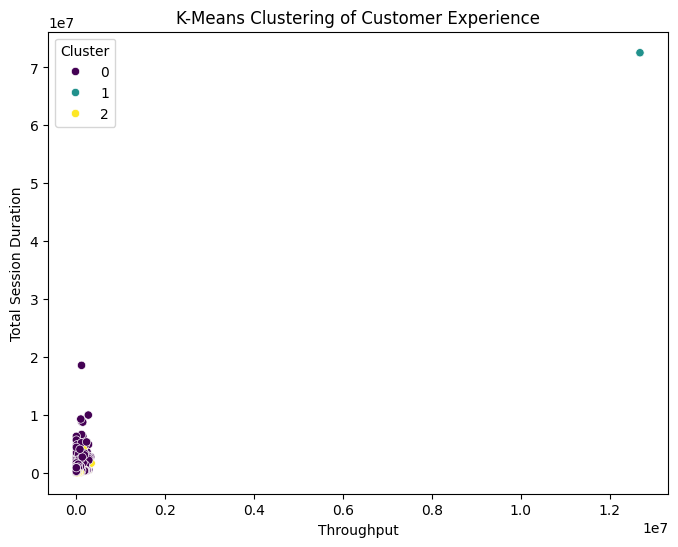

In [220]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_experience[['TCP Retransmission', 'RTT', 'Throughput', 'Total Session Duration']])

# Assign cluster labels to the DataFrame
customer_experience['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_descriptions = []
for i in range(3):
  cluster_data = customer_experience[customer_experience['Cluster'] == i]
  tcp_retransmission_mean = cluster_data['TCP Retransmission'].mean()
  rtt_mean = cluster_data['RTT'].mean()
  throughput_mean = cluster_data['Throughput'].mean()
  session_duration_mean = cluster_data['Total Session Duration'].mean()

  description = f"Cluster {i}:\n" \
                f"- Average TCP Retransmission: {tcp_retransmission_mean:.2f}\n" \
                f"- Average RTT: {rtt_mean:.2f}\n" \
                f"- Average Throughput: {throughput_mean:.2f}\n" \
                f"- Average Total Session Duration: {session_duration_mean:.2f}\n"

  cluster_descriptions.append(description)

for description in cluster_descriptions:
  print(description)


# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Throughput', y='Total Session Duration', hue='Cluster', data=customer_experience, palette='viridis')
plt.title('K-Means Clustering of Customer Experience')
plt.xlabel('Throughput')
plt.ylabel('Total Session Duration')
plt.show()

TASK 4- Satisfaction Analysis

Task 4.1-Write a Python program to assign:

4.a. engagement score to each user. Consider the engagement score as the

Euclidean distance between the user data point & the less engaged cluster (use

the first clustering for this)

In [221]:
# Assuming 'customer_engagement' DataFrame contains user data with engagement metrics
# and 'kmeans' is the fitted KMeans model from your previous code

# Find the centroid of the cluster with the lowest average engagement
cluster_centroids = kmeans.cluster_centers_
average_experience_per_cluster = customer_experience.groupby('Cluster')['Total Session Duration'].mean()
least_experience_cluster = average_experience_per_cluster.idxmin()
worst_experience_centroid = cluster_centroids[least_experience_cluster]

# Calculate Euclidean distance between each user and the worst experience cluster centroid
user_experience_scores = []
for index, row in customer_experience.iterrows():
    user_data = row[['TCP Retransmission', 'RTT', 'Throughput', 'Total Session Duration']]
    euclidean_distance = np.linalg.norm(user_data - worst_experience_centroid)
    user_experience_scores.append(euclidean_distance)

# Assign experience scores to each user
customer_engagement['Experience Score'] = user_experience_scores

# Print the DataFrame with the added 'Experience Score' column
customer_engagement

,Total Session Duration,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster,Experience Score
MSISDN/Number,,,,,,
3.360100e+10,1.167200e+05,8.426375e+08,3.605311e+07,1,0,1.953809e+07
3.360100e+10,1.812300e+05,1.207552e+08,3.610446e+07,1,0,1.953832e+07
3.360100e+10,1.349690e+05,5.566597e+08,3.930682e+07,1,0,1.953813e+07
3.360101e+10,4.987800e+04,4.019932e+08,2.032753e+07,1,0,1.271356e+06
3.360101e+10,3.710400e+04,1.363130e+09,9.428053e+07,2,0,2.890891e+07
...,...,...,...,...,...,...
3.379000e+10,1.409880e+05,4.445751e+08,3.573224e+07,1,0,1.953815e+07
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,9.645866e+09
3.197021e+12,8.773850e+05,1.948281e+08,3.729592e+07,1,2,1.955434e+07


In [222]:
# Assuming 'customer_engagement' DataFrame contains user data with engagement metrics
# and 'kmeans' is the fitted KMeans model from your previous code

# Calculate Euclidean distance between each user and the less engaged cluster centroid
less_engaged_centroid = kmeans.cluster_centers_[0]  # Assuming cluster 0 represents the less engaged group
user_engagement_scores = []
for index, row in customer_engagement.iterrows():
    user_data = row[['Total Session Duration', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Number of Sessions']]
    euclidean_distance = np.linalg.norm(user_data - less_engaged_centroid)
    user_engagement_scores.append(euclidean_distance)

# Assign engagement scores to each user
customer_engagement['Engagement Score'] = user_engagement_scores

# Print the DataFrame with the added 'Engagement Score' column
customer_engagement

,Total Session Duration,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster,Experience Score,Engagement Score
MSISDN/Number,,,,,,,
3.360100e+10,1.167200e+05,8.426375e+08,3.605311e+07,1,0,1.953809e+07,8.438415e+08
3.360100e+10,1.812300e+05,1.207552e+08,3.610446e+07,1,0,1.953832e+07,1.288906e+08
3.360100e+10,1.349690e+05,5.566597e+08,3.930682e+07,1,0,1.953813e+07,5.586992e+08
3.360101e+10,4.987800e+04,4.019932e+08,2.032753e+07,1,0,1.271356e+06,4.034185e+08
3.360101e+10,3.710400e+04,1.363130e+09,9.428053e+07,2,0,2.890891e+07,1.366656e+09
...,...,...,...,...,...,...,...
3.379000e+10,1.409880e+05,4.445751e+08,3.573224e+07,1,0,1.953815e+07,4.468259e+08
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,9.645866e+09,4.893935e+11
3.197021e+12,8.773850e+05,1.948281e+08,3.729592e+07,1,2,1.955434e+07,2.000981e+08


Task 4.2- Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [223]:
# Calculate the average of Engagement Score and Experience Score as Satisfaction Score
customer_engagement['Satisfaction Score'] = (customer_engagement['Engagement Score'] + customer_engagement['Experience Score']) / 2

# Sort the DataFrame by Satisfaction Score in descending order and get the top 10 satisfied customers
top_10_satisfied_customers = customer_engagement.sort_values('Satisfaction Score', ascending=False).head(10)

# Print the top 10 satisfied customers
top_10_satisfied_customers

,Total Session Duration,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster,Experience Score,Engagement Score,Satisfaction Score
MSISDN/Number,,,,,,,,
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,9.645866e+09,4.893935e+11,2.495197e+11
3.361489e+10,9.966898e+06,8.156743e+09,6.894830e+08,17,2,1.327552e+08,8.185850e+09,4.159302e+09
3.376054e+10,9.279434e+06,7.811295e+09,7.034786e+08,15,2,2.483457e+08,7.842928e+09,4.045637e+09
3.362578e+10,1.855375e+07,7.770043e+09,7.295774e+08,17,2,2.608065e+08,7.804224e+09,4.032515e+09
3.362632e+10,8.791927e+06,7.301517e+09,6.696507e+08,18,2,2.349801e+08,7.332182e+09,3.783581e+09
3.367588e+10,4.865947e+06,7.309542e+09,5.815688e+08,15,2,1.653910e+08,7.332674e+09,3.749033e+09
3.365973e+10,4.035428e+06,7.081602e+09,6.242603e+08,16,2,8.770527e+07,7.109101e+09,3.598403e+09
3.366646e+10,4.536757e+06,6.903440e+09,4.050610e+08,11,2,1.290432e+08,6.915350e+09,3.522196e+09
3.376041e+10,5.321667e+06,6.610852e+09,5.215189e+08,12,2,1.132927e+08,6.631426e+09,3.372359e+09


Task 4.3- Build a regression model of your choice to predict the satisfaction score of a customer. linear and XGBOOST, find the Mean square error and r2 value for both the models

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
# Assuming 'customer_engagement' DataFrame contains your data with 'Satisfaction Score' as the target variable
# and other relevant features.

# Separate features (X) and target (y)
X = customer_engagement.drop('Satisfaction Score', axis=1)
y = customer_engagement['Satisfaction Score']

# Convert categorical features to numerical using one-hot encoding or label encoding if necessary
# X = pd.get_dummies(X, columns=['Handset Type'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Model

In [226]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and R2 for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression:
Mean Squared Error: 1.4865929416196805e-13
R-squared: 1.0


XGBoost Model

In [227]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE and R2 for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)


XGBoost:
Mean Squared Error: 157640562322562.06
R-squared: 0.9970773109428988


4.4 Run a k-means (k=2) on the engagement & the experience score

In [228]:
# Assuming 'customer_engagement' DataFrame contains 'Engagement Score' and 'Experience Score'
X = customer_engagement[['Engagement Score', 'Experience Score']]

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
customer_engagement['Cluster'] = kmeans.labels_
# Assuming 'customer_engagement' DataFrame contains 'Engagement Score' and 'Experience Score'
X = customer_engagement[['Engagement Score', 'Experience Score']]

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
customer_engagement['Cluster'] = kmeans.labels_


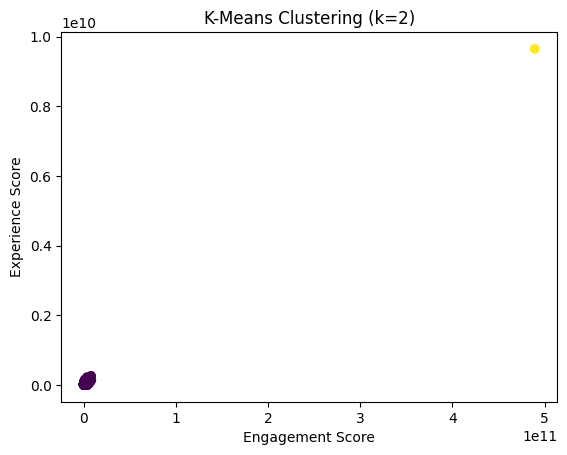

In [229]:
# Visualize the clusters using a scatter plot
plt.scatter(customer_engagement['Engagement Score'], customer_engagement['Experience Score'], c=customer_engagement['Cluster'])
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-Means Clustering (k=2)')
plt.show()

4.5 Aggregate the average satisfaction & experience score per cluster

In [230]:
# prompt: .

# Assuming 'customer_engagement' DataFrame contains 'Cluster', 'Engagement Score', and 'Experience Score' columns.

cluster_satisfaction = customer_engagement.groupby('Cluster').agg({
    'Engagement Score': 'mean',
    'Experience Score': 'mean'
})

print("Average Satisfaction & Experience Score per Cluster:\n", cluster_satisfaction)

Average Satisfaction & Experience Score per Cluster:
          Engagement Score  Experience Score
Cluster                                    
0            6.386870e+08      1.883868e+07
1            4.893935e+11      9.645866e+09


4.6 Export your final table containing all user ID + engagement, experience &

satisfaction scores in your local MySQL database. Report a screenshot of a select query output **on the exported table **

In [244]:
!pip install mysql-connector-python

In [247]:
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='telecom'
)

cursor = connection.cursor()

InterfaceError: 2003: Can't connect to MySQL server on 'localhost:3306' (Errno 111: Connection refused)